In [4]:
from reservoirpy.nodes import Reservoir, Ridge
from reservoirpy import set_seed
# set_seed(42)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

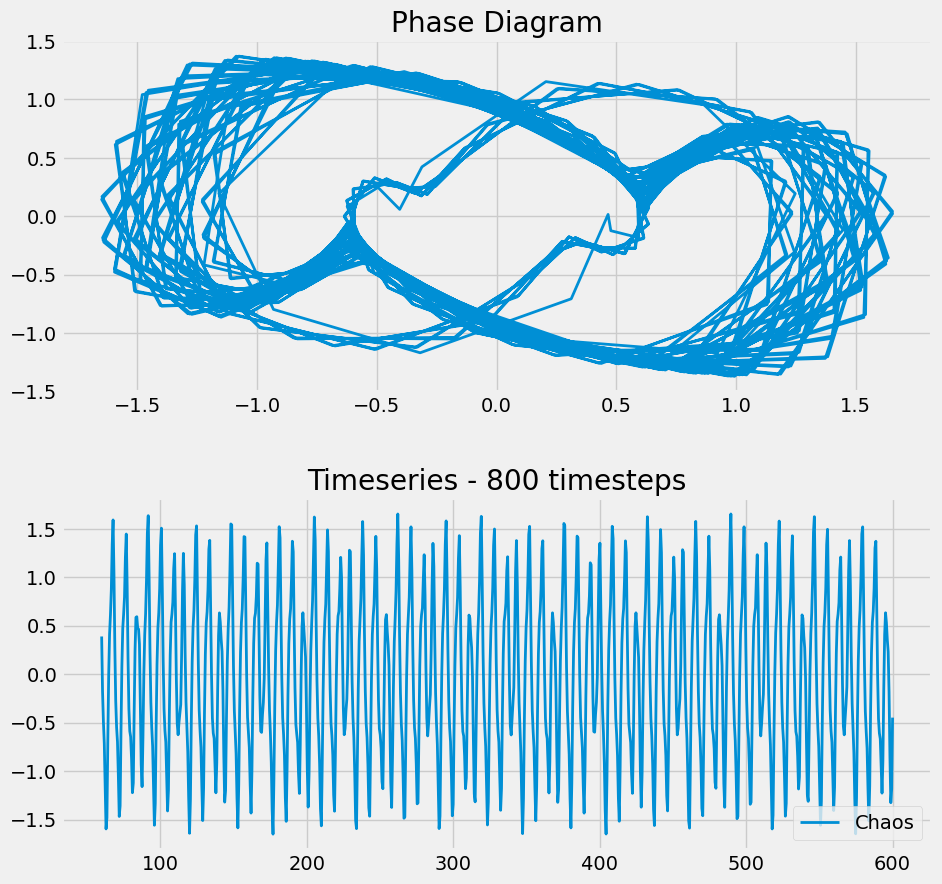

In [393]:
mu=1.53 #8.53
A=1.1
omega = 2.10
def f_1(y, x):
    y1, y2 = y
    #return [y2, mu*(1-y2**2)*y2-y1]
    return [y2, A*np.sin(omega*x)+mu*(1-y2**2)*y2-y1]
x = np.linspace(0,600,1001)
y0 = [0.0001,0.0001]
[y1,y2]=odeint(f_1, y0, x).T
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.subplot(211)
plt.plot(y1[100:],y2[100:],linewidth=2)
plt.title('Phase Diagram')
plt.grid(True)
plt.subplot(212)
plt.plot(x[100:],y1[100:],linewidth=2, label='Chaos')
plt.title('Timeseries - 800 timesteps')
plt.legend(loc='best')
plt.grid(True)
plt.show()

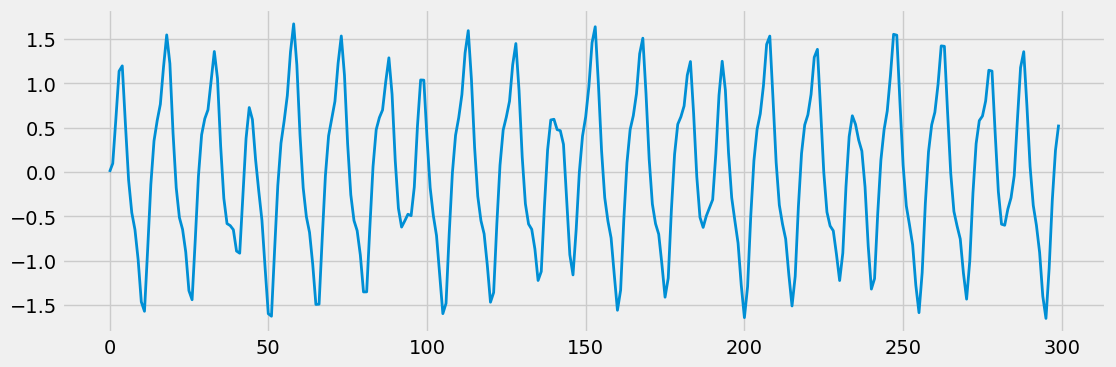

In [396]:
plt.figure(figsize=(12,4))
plt.plot(y1[:300],linewidth=2, label='Хаос')

In [6]:
y1.shape

(1001,)

In [168]:
X_train = y1[:300].reshape(-1, 1)
Y_train = y1[50:350].reshape(-1, 1)

X_test = y1[300:-50].reshape(-1, 1)
Y_test = y1[350:].reshape(-1, 1)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

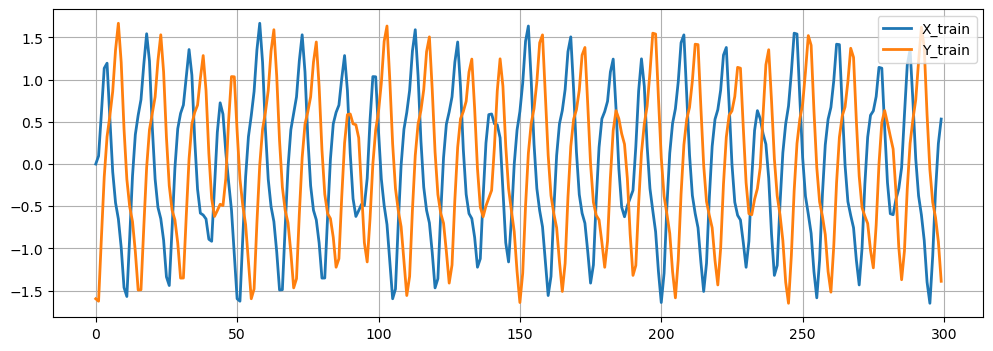

In [211]:
plt.figure(figsize=(12,4))
plt.plot(X_train,linewidth=2, label='X_train')
plt.plot(Y_train,linewidth=2, label='Y_train')
plt.legend()
plt.grid()
plt.show()

In [170]:
from reservoirpy.nodes import Reservoir, Ridge

reservoir1 = Reservoir(100, lr=0.8, sr=0.5, regularization = 1e-8)
# reservoir2 = Reservoir(100, lr=0.5, sr=1.25, connectivity = 0.1, regularization = 1e-8)

readout = Ridge(ridge=1e-7)

esn_model = reservoir1 >> readout
# deep_esn = (reservoir1 >> reservoir2) >> readout
esn_model = esn_model.fit(X_train, Y_train)

Running Model-9:   0%|          | 0/1 [00:00<?, ?it/s]
Running Model-9: 300it [00:00, 8525.64it/s]           
Running Model-9: 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]


Fitting node Ridge-9...


In [175]:
# y_pred = esn_model.run(y1[50:].reshape(-1, 1))
y_pred = esn_model.run(X_test)

Running Model-9: 651it [00:00, 18448.40it/s]          


In [176]:
y_pred.shape

(651, 1)

In [178]:
Y_test.shape

(651, 1)

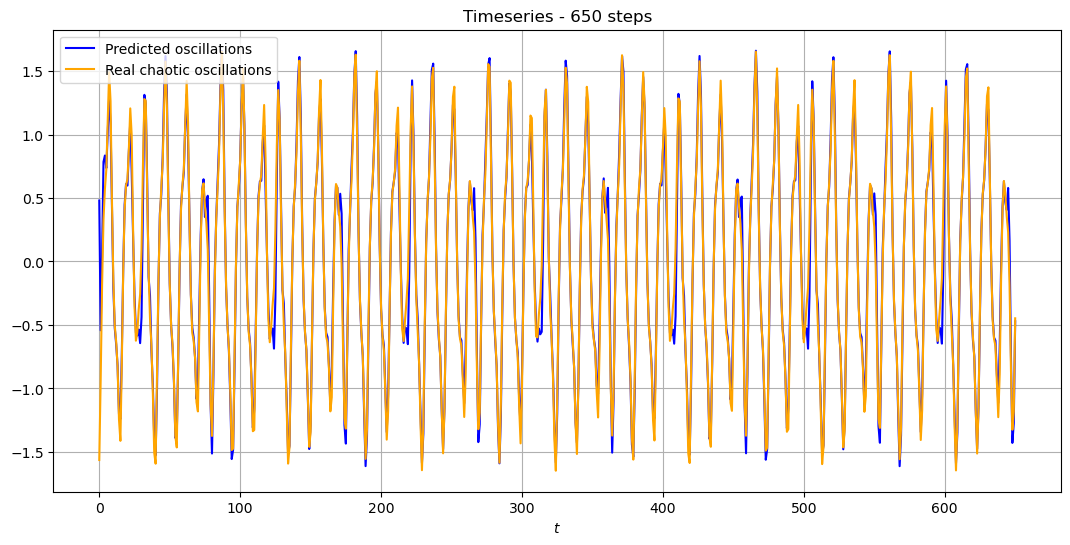

In [180]:
plt.figure(figsize=(13, 6))
plt.title("Timeseries - 650 steps")
plt.xlabel("$t$")
# plt.plot(y_pred[50:600], label="Predicted oscillations ", color="blue")
# plt.plot(y1[:550], label="Real chaotic oscillations", color="orange")
plt.plot(y_pred, label="Predicted oscillations", color="blue")
plt.plot(Y_test, label="Real chaotic oscillations", color="orange")
plt.grid()
plt.legend()
plt.show()

In [181]:
from sklearn.metrics import r2_score, mean_squared_error

r2_esn = r2_score(Y_test, y_pred)
mse_esn = mean_squared_error(Y_test, y_pred)

print(f'R2 of ESN = {round(r2_esn, 3)}\nMSE of ESN = {round(mse_esn, 3)}')


R2 of ESN = 0.972
MSE of ESN = 0.021


In [201]:
def plot_results(y_pred, y_test, sample=y_pred.shape[0]):

    fig = plt.figure(figsize=(15, 9))
    plt.subplot(211)
    plt.plot(np.arange(sample), y_pred[:sample], lw=3, label="ESN prediction")
    plt.plot(np.arange(sample), y_test[:sample], linestyle="--", lw=2, label="True value")
    plt.plot(np.abs(y_test[:sample] - y_pred[:sample]), label="Absolute deviation")

    plt.title('')
    plt.grid()
    plt.legend()
    plt.show()

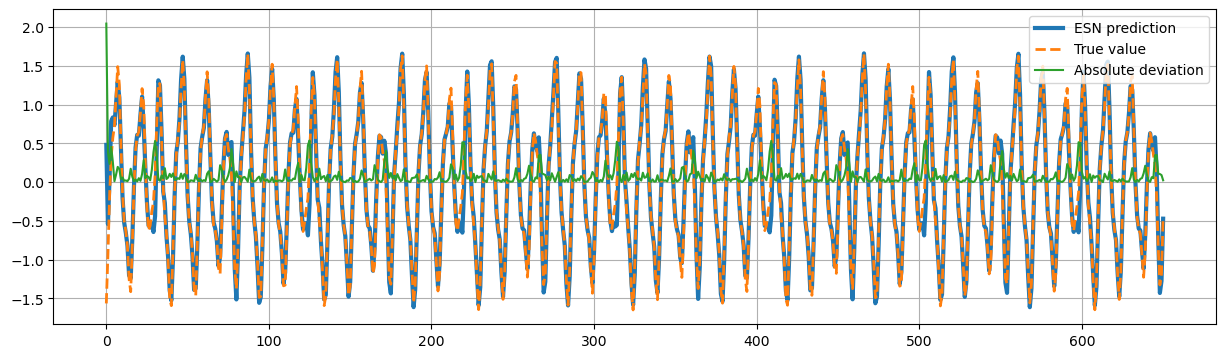

In [202]:
plot_results(y_pred, Y_test)

In [186]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [190]:
# model = ARIMA(Y_train, order = (1,1,2))
# model_fit = model.fit()
# print(model_fit.summary())

In [109]:
# arima_pred = model_fit.fittedvalues

In [194]:
print('\t ARIMA MODEL : In - Sample Forecasting \n')

history = [x for x in Y_train]
predictions = []

for t in range(len(Y_test)):

    model = ARIMA(history, order=(1,1,2))
    model_fit = model.fit()

    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))

    obs = Y_test[t]
    history.append(obs)

    print(f'predicted = {yhat}, expected = {obs}')

	 ARIMA MODEL : In - Sample Forecasting 

predicted = -1.762773634617204, expected = [-1.56390355]
predicted = -1.3483138364996408, expected = [-0.92900085]
predicted = -0.07328336995996476, expected = [-0.18276807]
predicted = 0.05105819677199086, expected = [0.33067311]
predicted = 0.7245930622127448, expected = [0.57058626]
predicted = 0.5765051813679144, expected = [0.72410877]
predicted = 0.8469766074936658, expected = [1.10217887]
predicted = 1.6364766123273387, expected = [1.48910579]
predicted = 1.5006275949268624, expected = [1.26333361]
predicted = 0.7755390852399895, expected = [0.48290671]
predicted = -0.21630122016050635, expected = [-0.15089556]
predicted = -0.3422389110333238, expected = [-0.50646077]
predicted = -0.7457104313245757, expected = [-0.631931]
predicted = -0.5988510209060092, expected = [-0.83154569]
predicted = -1.1187424442518727, expected = [-1.24588364]
predicted = -1.6594309549809916, expected = [-1.41295426]
predicted = -1.1611380172436179, expected = 

In [195]:
r2_arima = r2_score(Y_test, predictions[:651])
mse_arima = mean_squared_error(Y_test, predictions[:651])

print(f'R2 of ARIMA = {round(r2_arima, 3)}\nMSE of ARIMA = {round(mse_arima, 3)}')

R2 of ARIMA = 0.94
MSE of ARIMA = 0.044


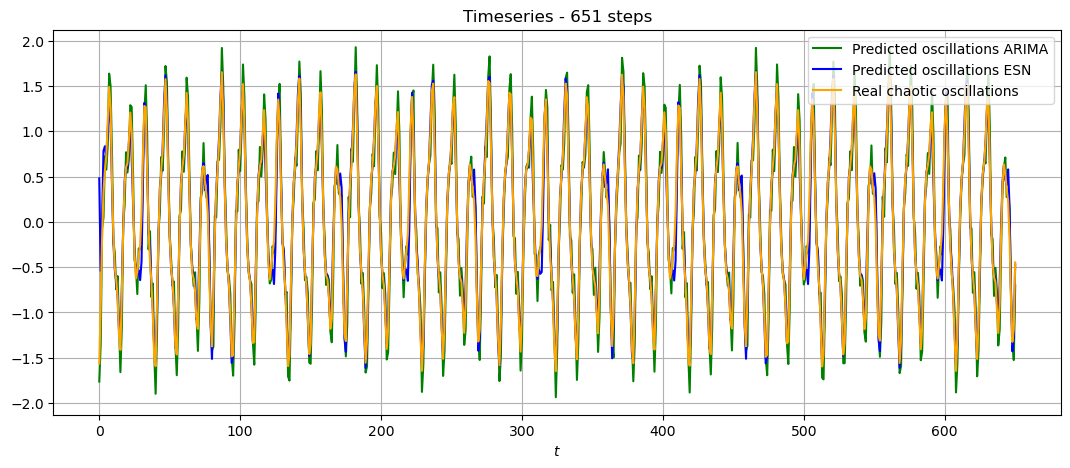

In [207]:
plt.figure(figsize=(13, 5))
plt.title("Timeseries - 651 steps")
plt.xlabel("$t$")
plt.plot(predictions[:651], label="Predicted oscillations ARIMA", color="green")
plt.plot(y_pred, label = "Predicted oscillations ESN", color = 'blue')
plt.plot(Y_test, label="Real chaotic oscillations", color="orange")
plt.grid()
plt.legend()
plt.show()

## Bitcoin prediction

In [624]:
data = pd.read_csv('BTC-USD.csv')
data.head()

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100

In [6]:
from reservoirpy.nodes import Reservoir, Ridge

In [7]:
data.tail()

Date          Open          High           Low         Close  \
2708  2022-02-15  42586.464844  44667.218750  42491.035156  44575.203125   
2709  2022-02-16  44578.277344  44578.277344  43456.691406  43961.859375   
2710  2022-02-17  43937.070313  44132.972656  40249.371094  40538.011719   
2711  2022-02-18  40552.132813  40929.152344  39637.617188  40030.976563   
2712  2022-02-19  40022.132813  40246.027344  40010.867188  40126.429688   

         Adj Close       Volume  
2708  44575.203125  22721659051  
2709  43961.859375  19792547657  
2710  40538.011719  26246662813  
2711  40030.976563  23310007704  
2712  40126.429688  22263900160

In [634]:
X_train_btc = data.Close[:2000].to_numpy().reshape(-1, 1)
Y_train_btc = data.Close[:2300].to_numpy().reshape(-1, 1)

X_test_btc = data.Close[230:].to_numpy().reshape(-1, 1)
Y_test_btc = data.Close[230:].to_numpy().reshape(-1, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [635]:
scaler = MinMaxScaler()
scaler.fit(data.Close.to_numpy().reshape(-1, 1))

X_train_btc = scaler.fit_transform(X_train_btc)
Y_train_btc = scaler.transform(Y_train_btc)

X_test_btc = scaler.transform(X_test_btc)
Y_test_btc = scaler.transform(Y_test_btc)

In [9]:
X_test_btc.shape

(413, 1)

In [636]:
reser_btc = Reservoir(100, lr=0.05, sr=1.25, connectivity = 0.1, regularization = 1e-8)

readout_btc = Ridge(ridge=1e-7)

esn_btc = reser_btc >> readout_btc
# deep_esn = (reservoir1 >> reservoir2) >> readout
esn_btc = esn_btc.fit(X_train_btc, Y_train_btc)

Running Model-64:   0%|          | 0/1 [00:00<?, ?it/s]
Running Model-64: 2000it [00:00, 9548.00it/s]          
Running Model-64:   0%|          | 0/1 [00:00<?, ?it/s]


ValueError: shapes (1,2300) and (2000,101) not aligned: 2300 (dim 1) != 2000 (dim 0)

In [629]:
y_pred_btc = esn_btc.run(X_test_btc)

Running Model-62: 413it [00:00, 11911.54it/s]          


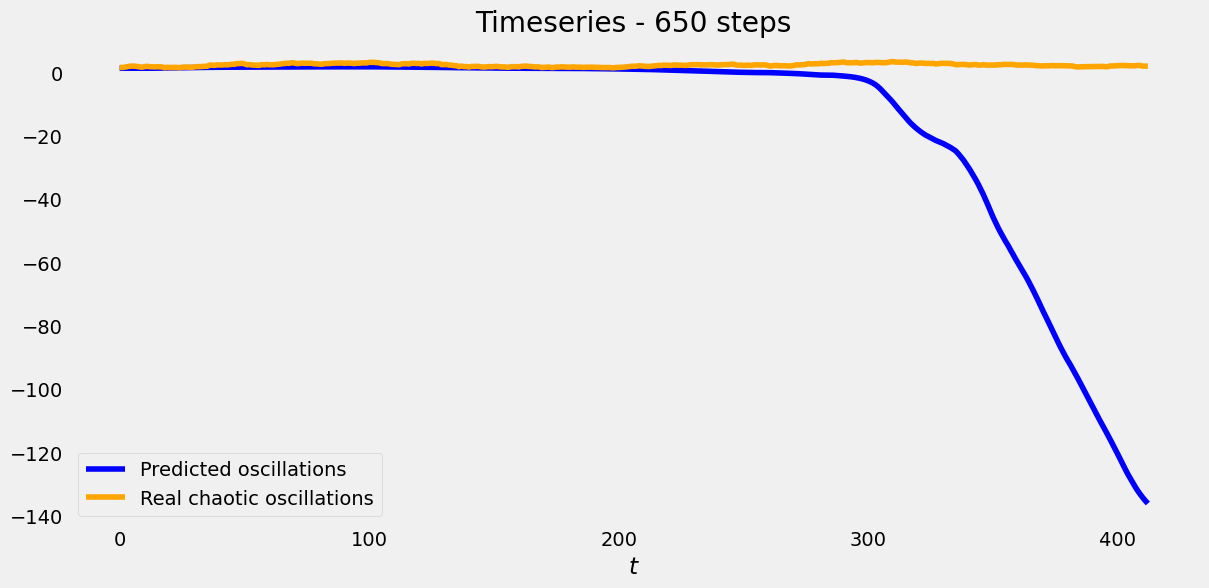

In [630]:
plt.figure(figsize=(13, 6))
plt.title("Timeseries - 650 steps")
plt.xlabel("$t$")
plt.plot(y_pred_btc, label="Predicted oscillations ", color="blue")
plt.plot(Y_test_btc, label="Real chaotic oscillations", color="orange")
plt.grid()
plt.legend()
plt.show()

## Hénon Map

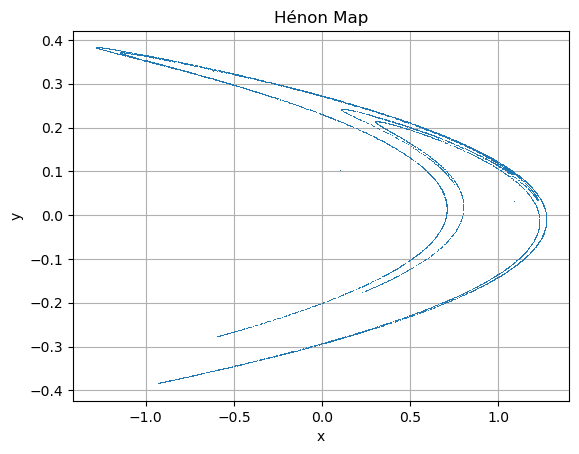

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Hénon Map parameters
a = 1.4
b = 0.3

# Initial condition
x0, y0 = 0.1, 0.1
length = 10000

# Generate Hénon map
x, y = [x0], [y0]
for _ in range(length-1):
    x_next = 1 - a * x[-1]**2 + y[-1]
    y_next = b * x[-1]
    x.append(x_next)
    y.append(y_next)

# Plot the Hénon map
plt.plot(x, y, ',')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hénon Map')
plt.grid()



## Rossler Attractor

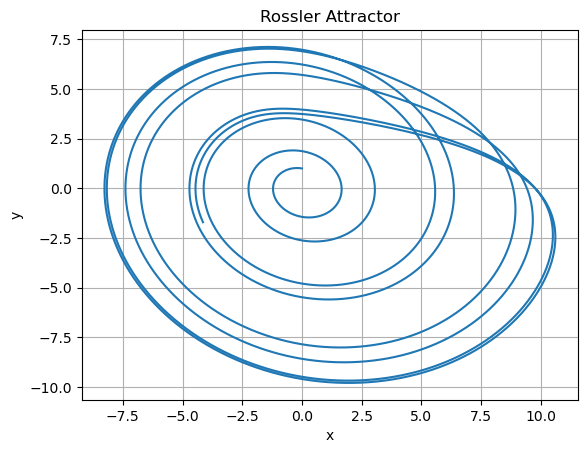

In [20]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Rossler Attractor parameters
a = 0.2
b = 0.2
c = 5.7

# Rossler Attractor equations
def rossler(t, y):
    dydt = [-y[1] - y[2],
            y[0] + a * y[1],
            b + y[2] * (y[0] - c)]
    return dydt

# Initial condition and time span
y0 = [0.0, 1.0, 0.0]
t_span = (0, 50)
t_eval = np.linspace(0, 50, 10000)

# Solve the differential equations
sol = solve_ivp(rossler, t_span, y0, t_eval=t_eval)

# Plot the Rossler attractor
plt.plot(sol.y[0], sol.y[1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Rossler Attractor')
plt.grid()

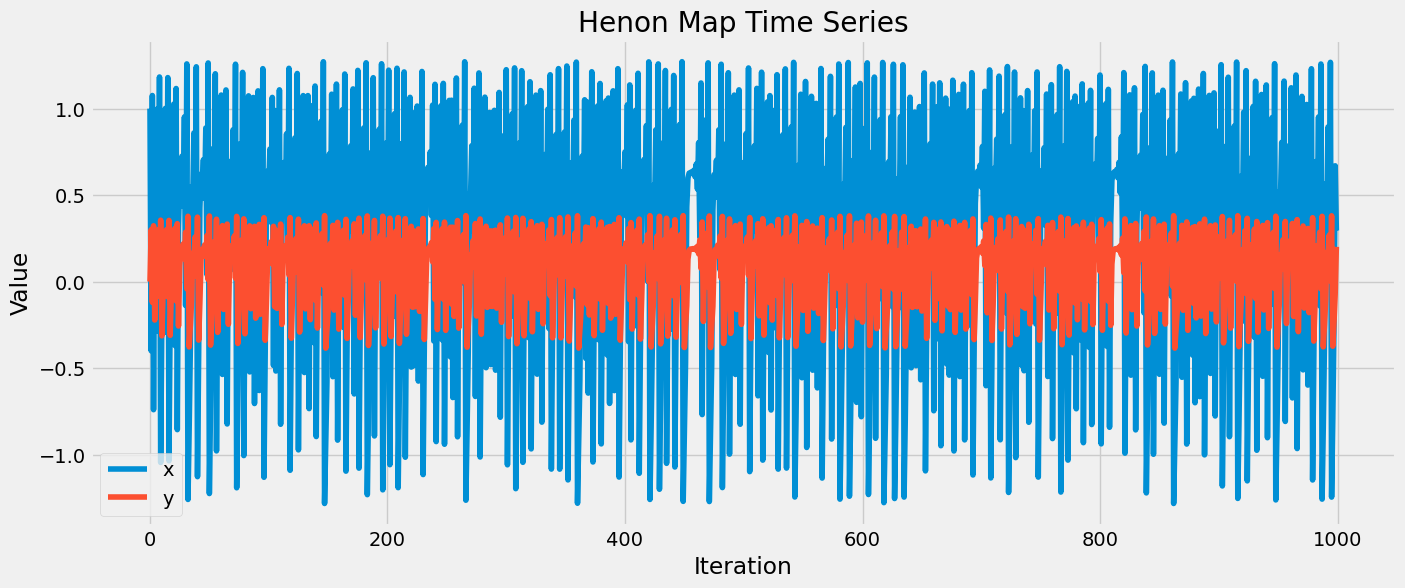

In [1346]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Henon map parameters
a_henon = 1.4
b_henon = 0.3

# Initial conditions for Henon map
x_henon = 0
y_henon = 0

# Number of iterations for Henon map
n_iterations = 1000

# Arrays to store the Henon map time series
x_series_henon = np.zeros(n_iterations)
y_series_henon = np.zeros(n_iterations)

# Generate Henon map time series
for i in range(n_iterations):
    x_new = 1 - a_henon * x_henon ** 2 + y_henon
    y_new = b_henon * x_henon
    x_henon, y_henon = x_new, y_new
    x_series_henon[i] = x_henon
    y_series_henon[i] = y_henon

# Plot Henon map time series
plt.figure(figsize=(15, 6))
plt.plot(x_series_henon, label='x')
plt.plot(y_series_henon, label='y')
plt.title('Henon Map Time Series')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

Text(0.5, 1.0, 'Hénon Map')

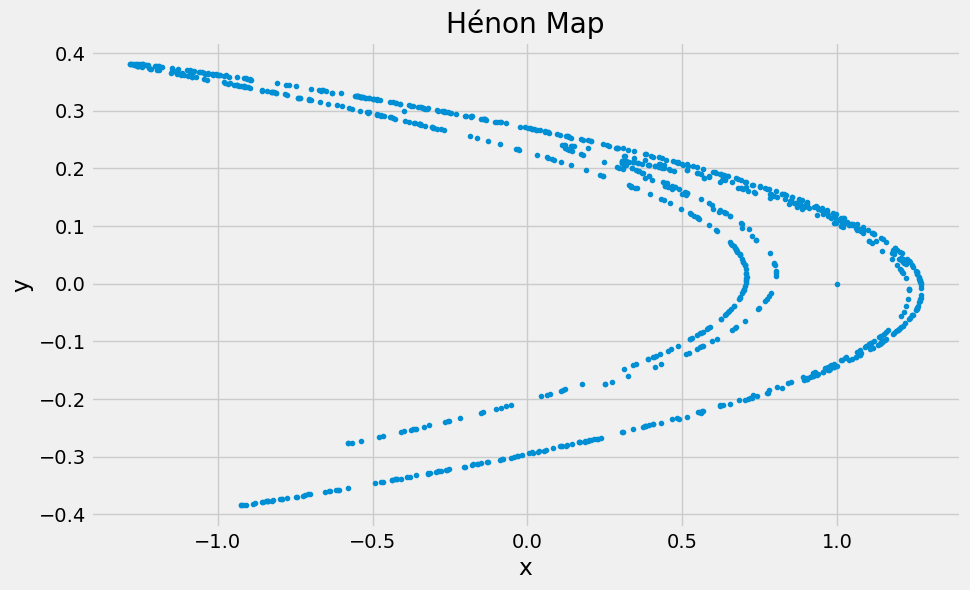

In [1351]:
plt.figure(figsize=(10,6))
plt.plot(x_series_henon, y_series_henon, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hénon Map')

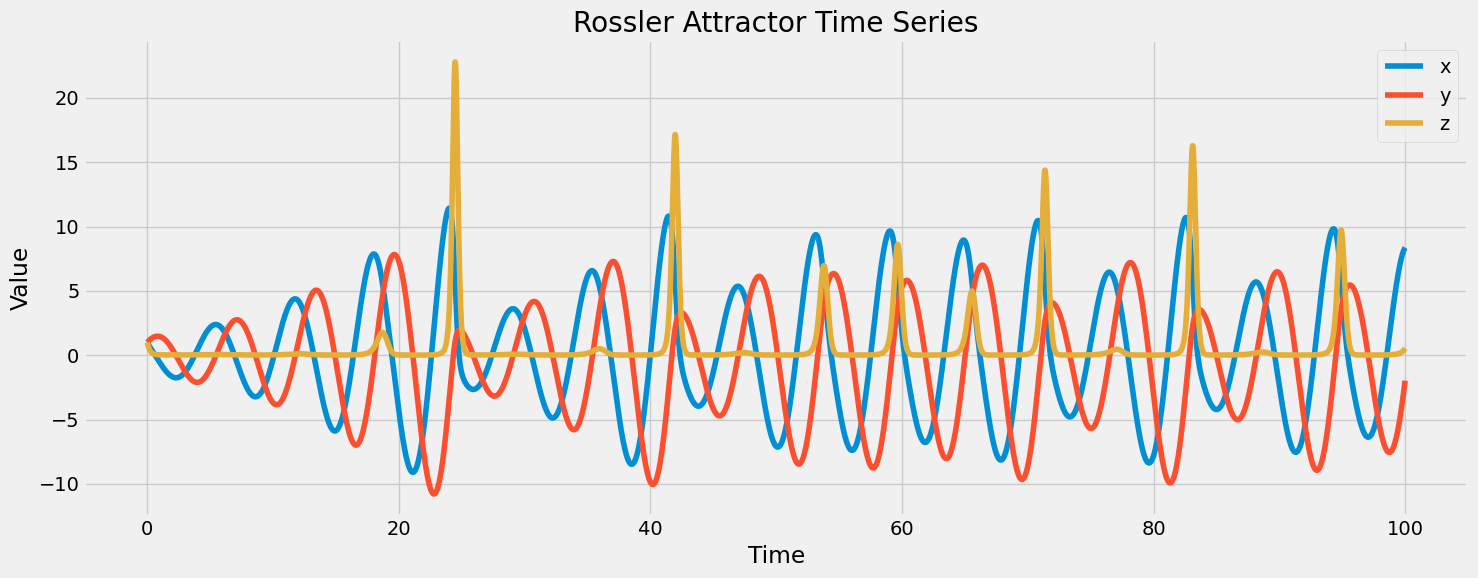

In [329]:
# Rossler Attractor parameters
a_rossler = 0.2
b_rossler = 0.2
c_rossler = 5.7

# Time points for Rossler Attractor
t_start = 0
t_end = 100
t_points = np.linspace(t_start, t_end, 10000)

# Rossler Attractor equations
def rossler(t, state):
    x, y, z = state
    dxdt = -y - z
    dydt = x + a_rossler * y
    dzdt = b_rossler + z * (x - c_rossler)
    return [dxdt, dydt, dzdt]

# Initial conditions for Rossler Attractor
initial_state_rossler = [1, 1, 1]

# Solve the Rossler system
solution_rossler = solve_ivp(rossler, [t_start, t_end], initial_state_rossler, t_eval=t_points)

# Plot Rossler Attractor time series
plt.figure(figsize=(15, 6))
plt.plot(solution_rossler.t, solution_rossler.y[0], label='x')
plt.plot(solution_rossler.t, solution_rossler.y[1], label='y')
plt.plot(solution_rossler.t, solution_rossler.y[2], label='z')
plt.title('Rossler Attractor Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()

# Infection data

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [56]:
infections = pd.read_excel('infections_data.xlsx', header=2)
infections.head()

Unnamed: 0 Unnamed: 1  Всего  0 - 2  3 - 6  7 - 14  \
0  1990.1 (01.01.1990 - 07.01.1990)          Н  84268  13705  19151   11590   
1  1990.2 (08.01.1990 - 14.01.1990)          Н  93313  14324  17894   10587   
2  1990.3 (15.01.1990 - 21.01.1990)          Н  96043  13048  17784   15731   
3  1990.4 (22.01.1990 - 28.01.1990)          Н  94043  12562  16901   19568   
4  1990.5 (29.01.1990 - 04.02.1990)          Н  86911  12379  15610   19919   

   15 и ст.  15 - 64  65 и ст.  3 - 4  ...  65 и ст..7  3 - 4.7  Всего.8  \
0     39822      NaN       NaN    NaN  ...         NaN      NaN  5025196   
1     50508      NaN       NaN    NaN  ...         NaN      NaN  5025196   
2     49480      NaN       NaN    NaN  ...         NaN      NaN  5025196   
3     45012      NaN       NaN    NaN  ...         NaN      NaN  5025196   
4     39003      NaN       NaN    NaN  ...         NaN      NaN  5025196   

   0 - 2.8  3 - 6.8  7 - 14.8  15 и ст..8  15 - 64.8  65 и ст..8  3 - 4.8  
0   207764   272635    487940     4056857        NaN         NaN      NaN  
1   207764   272635    487940     4056857        NaN         NaN      NaN  
2   207764   272635    487940     4056857        NaN         NaN      NaN  
3   207764   272635    487940     4056857        NaN         NaN      NaN  
4   207764   272635    487940     4056857        NaN         NaN      NaN  

[5 rows x 74 columns]

In [474]:
infections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 75 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  1608 non-null   object        
 1   Unnamed: 1  1608 non-null   object        
 2   Всего       1608 non-null   int64         
 3   0 - 2       1608 non-null   int64         
 4   3 - 6       1608 non-null   int64         
 5   7 - 14      1608 non-null   int64         
 6   15 и ст.    1608 non-null   int64         
 7   15 - 64     577 non-null    float64       
 8   65 и ст.    577 non-null    float64       
 9   3 - 4       577 non-null    float64       
 10  Всего.1     767 non-null    float64       
 11  0 - 2.1     767 non-null    float64       
 12  3 - 6.1     767 non-null    float64       
 13  7 - 14.1    767 non-null    float64       
 14  15 и ст..1  767 non-null    float64       
 15  15 - 64.1   577 non-null    float64       
 16  65 и ст..1  577 non-null

In [58]:
infections.describe()

Всего         0 - 2         3 - 6        7 - 14      15 и ст.  \
count    1608.000000   1608.000000   1608.000000   1608.000000   1608.000000   
mean    25340.756219   4134.778607   5117.443408   5139.123756  10949.410448   
std     15986.434110   2346.974505   3437.953008   4355.086090   7169.761994   
min      1730.000000    452.000000    418.000000    277.000000    446.000000   
25%     13863.750000   2436.500000   2454.500000   1450.750000   6201.000000   
50%     23399.000000   3671.500000   4529.000000   4866.500000   9398.500000   
75%     34464.500000   5510.750000   7181.000000   6969.250000  14358.000000   
max    155327.000000  14324.000000  27166.000000  44336.000000  70963.000000   

            15 - 64     65 и ст.         3 - 4       Всего.1      0 - 2.1  \
count    577.000000   577.000000    577.000000    767.000000   767.000000   
mean   12665.495667  1231.194107   4016.717504    249.237288    17.518905   
std     5240.019887   657.257917   2091.221908   1198.151275    89.605295   
min     1524.000000   219.000000    535.000000      0.000000     0.000000   
25%     8404.000000   776.000000   2063.000000      1.000000     0.000000   
50%    12376.000000  1082.000000   4082.000000      6.000000     0.000000   
75%    15715.000000  1613.000000   5747.000000     39.000000     2.000000   
max    38444.000000  4324.000000  13431.000000  17053.000000  1279.000000   

       ...  65 и ст..7  3 - 4.7       Всего.8        0 - 2.8        3 - 6.8  \
count  ...         2.0      2.0  1.608000e+03    1608.000000    1608.000000   
mean   ...         0.0      0.0  4.880194e+06  139876.861940  190374.577114   
std    ...         0.0      0.0  2.496014e+05   38525.723774   51842.208622   
min    ...         0.0      0.0  4.564802e+06   89474.000000  126678.000000   
25%    ...         0.0      0.0  4.600276e+06  104700.000000  151443.000000   
50%    ...         0.0      0.0  4.888542e+06  129913.000000  161538.000000   
75%    ...         0.0      0.0  5.034700e+06  180194.000000  247800.000000   
max    ...         0.0      0.0  5.383890e+06  207764.000000  282273.000000   

            7 - 14.8    15 и ст..8     15 - 64.8     65 и ст..8        3 - 4.8  
count    1608.000000  1.608000e+03  6.170000e+02     617.000000     617.000000  
mean   388868.935323  4.161074e+06  3.586590e+06  781447.076175   96163.228525  
std    103001.873664  2.117380e+05  1.466924e+05   66150.342866   21909.322490  
min    250182.000000  3.949910e+06  3.321333e+06  688652.000000   76036.000000  
25%    289047.000000  4.007446e+06  3.353942e+06  718742.000000   76036.000000  
50%    348985.000000  4.042594e+06  3.633947e+06  781894.000000   80569.000000  
75%    493856.000000  4.374156e+06  3.692974e+06  830058.000000  117680.000000  
max    520972.000000  4.578669e+06  3.707693e+06  896558.000000  134152.000000  

[8 rows x 72 columns]

In [59]:
infections['Unnamed: 1'].unique()

array(['Н'], dtype=object)

In [62]:
infections.tail()

Unnamed: 0 Unnamed: 1  Всего  0 - 2  3 - 6  \
1603  2020.39 (21.09.2020 - 27.09.2020)          Н  40182   3849   5500   
1604  2020.40 (28.09.2020 - 04.10.2020)          Н  35330   3723   5294   
1605  2020.41 (05.10.2020 - 11.10.2020)          Н  31983   3616   5442   
1606  2020.42 (12.10.2020 - 18.10.2020)          Н  33820   4123   6323   
1607  2020.43 (19.10.2020 - 25.10.2020)          Н  37861   4369   7292   

      7 - 14  15 и ст.  15 - 64  65 и ст.   3 - 4  ...  65 и ст..7  3 - 4.7  \
1603    9162     21671  19973.0    1698.0  3052.0  ...         NaN      NaN   
1604    6026     20287  18489.0    1798.0  3091.0  ...         NaN      NaN   
1605    4850     18075  16228.0    1847.0  3310.0  ...         NaN      NaN   
1606    5535     17839  16005.0    1834.0  3764.0  ...         NaN      NaN   
1607    6206     19994  17897.0    2097.0  4362.0  ...         NaN      NaN   

      Всего.8  0 - 2.8  3 - 6.8  7 - 14.8  15 и ст..8  15 - 64.8  65 и ст..8  \
1603  5383890   196779   259457    348985     4578669  3682111.0    896558.0   
1604  5383890   196779   259457    348985     4578669  3682111.0    896558.0   
1605  5383890   196779   259457    348985     4578669  3682111.0    896558.0   
1606  5383890   196779   259457    348985     4578669  3682111.0    896558.0   
1607  5383890   196779   259457    348985     4578669  3682111.0    896558.0   

       3 - 4.8  
1603  134152.0  
1604  134152.0  
1605  134152.0  
1606  134152.0  
1607  134152.0  

[5 rows x 74 columns]

### Lest change column with dates into column of datetime type and make it as index

In [63]:
infections['date'] = pd.date_range (start='1/1/1990', end='10/25/2020', freq='W')

In [64]:
infections['date'].tail()

1603   2020-09-27
1604   2020-10-04
1605   2020-10-11
1606   2020-10-18
1607   2020-10-25
Name: date, dtype: datetime64[ns]

In [65]:
infections_cleared = infections.drop(columns=['Unnamed: 0', 'Unnamed: 1'])
infections_cleared = infections_cleared.set_index('date')
infections_cleared = infections_cleared.drop(infections_cleared.columns[5:], axis=1)

In [66]:
infections_cleared.head()

Всего  0 - 2  3 - 6  7 - 14  15 и ст.  15 - 64  65 и ст.  3 - 4  \
date                                                                          
1990-01-07  84268  13705  19151   11590     39822      NaN       NaN    NaN   
1990-01-14  93313  14324  17894   10587     50508      NaN       NaN    NaN   
1990-01-21  96043  13048  17784   15731     49480      NaN       NaN    NaN   
1990-01-28  94043  12562  16901   19568     45012      NaN       NaN    NaN   
1990-02-04  86911  12379  15610   19919     39003      NaN       NaN    NaN   

            Всего.1  0 - 2.1  ...  65 и ст..7  3 - 4.7  Всего.8  0 - 2.8  \
date                          ...                                          
1990-01-07      NaN      NaN  ...         NaN      NaN  5025196   207764   
1990-01-14      NaN      NaN  ...         NaN      NaN  5025196   207764   
1990-01-21      NaN      NaN  ...         NaN      NaN  5025196   207764   
1990-01-28      NaN      NaN  ...         NaN      NaN  5025196   207764   
1990-02-04      NaN      NaN  ...         NaN      NaN  5025196   207764   

            3 - 6.8  7 - 14.8  15 и ст..8  15 - 64.8  65 и ст..8  3 - 4.8  
date                                                                       
1990-01-07   272635    487940     4056857        NaN         NaN      NaN  
1990-01-14   272635    487940     4056857        NaN         NaN      NaN  
1990-01-21   272635    487940     4056857        NaN         NaN      NaN  
1990-01-28   272635    487940     4056857        NaN         NaN      NaN  
1990-02-04   272635    487940     4056857        NaN         NaN      NaN  

[5 rows x 72 columns]

In [91]:
infections_cleared.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1608 entries, 1990-01-07 to 2020-10-25
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Всего     1608 non-null   int64
 1   0 - 2     1608 non-null   int64
 2   3 - 6     1608 non-null   int64
 3   7 - 14    1608 non-null   int64
 4   15 и ст.  1608 non-null   int64
dtypes: int64(5)
memory usage: 75.4 KB


<Axes: title={'center': 'Patients in St. Petersburg'}, xlabel='date'>

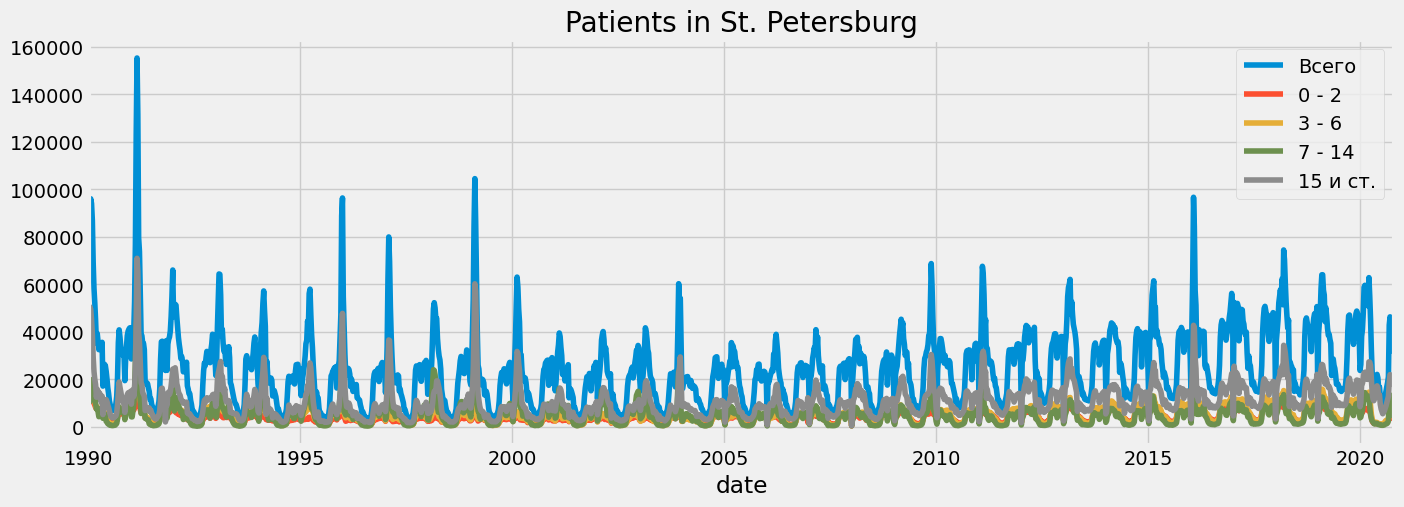

In [98]:
infections_cleared.plot(
    figsize=(15, 5),
    title='Patients in St. Petersburg')

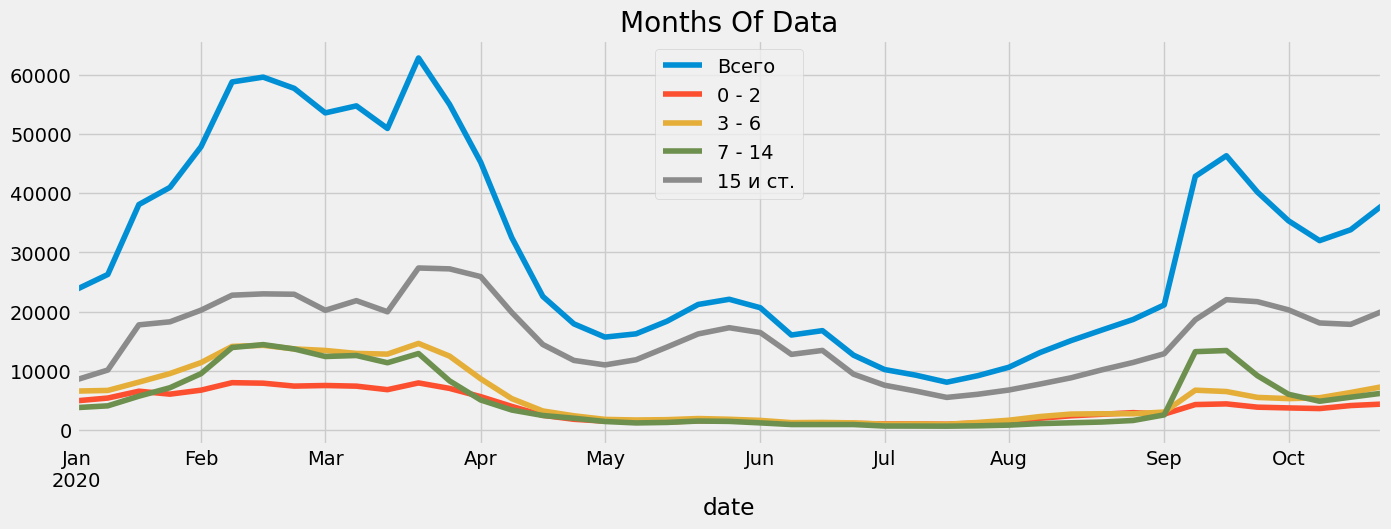

In [107]:
infections_cleared.loc[(infections_cleared.index >= '01-01-2020')] \
    .plot(figsize=(15, 5), title='Months Of Data')
plt.show()

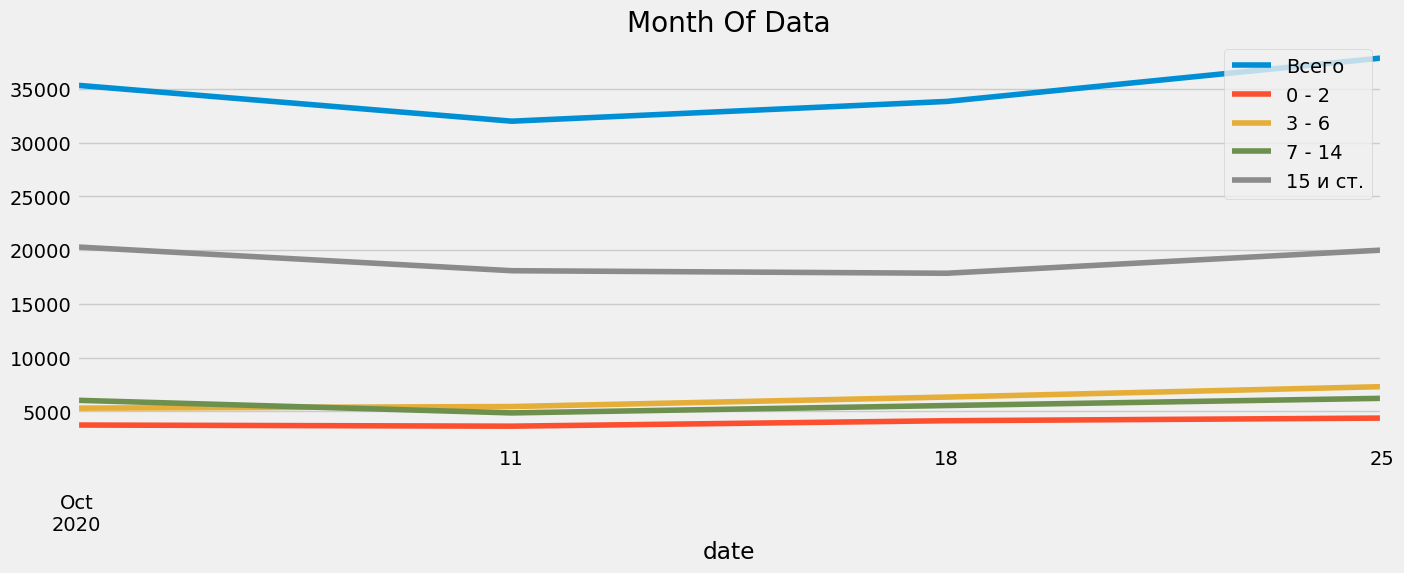

In [108]:
infections_cleared.loc[(infections_cleared.index >= '10-01-2020')] \
    .plot(figsize=(15, 5), title='Month Of Data')
plt.show()

/var/folders/_2/3r2pyzk16rdbwgbf6s6rlngr0000gn/T/ipykernel_1383/822182294.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(infections_cleared['0 - 2'], hist=False, label='0 - 2')
/var/folders/_2/3r2pyzk16rdbwgbf6s6rlngr0000gn/T/ipykernel_1383/822182294.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

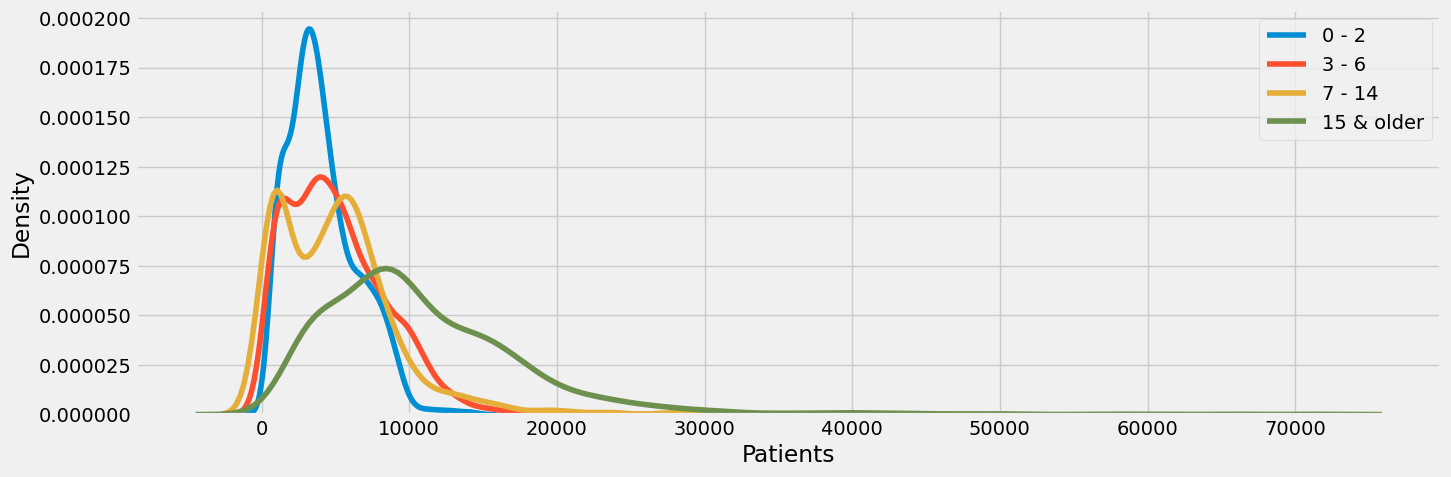

In [558]:
plt.figure(figsize=(15, 5))
sns.distplot(infections_cleared['0 - 2'], hist=False, label='0 - 2')
sns.distplot(infections_cleared['3 - 6'], hist=False, label='3 - 6')
sns.distplot(infections_cleared['7 - 14'], hist=False, label='7 - 14')
sns.distplot(infections_cleared['15 и ст.'], hist=False, label='15 & older')
plt.xlabel('Patients')
plt.legend()

In [109]:
from sklearn.model_selection import train_test_split

In [112]:
infections_cleared.iloc[round(infections_cleared.shape[0]*0.8)]

Всего       16139
0 - 2        3176
3 - 6        2811
7 - 14       1394
15 и ст.     8758
Name: 2014-08-31 00:00:00, dtype: int64

In [142]:
train = infections_cleared['Всего'].loc[infections_cleared.index < '08-31-2014']
test = infections_cleared['Всего'].loc[infections_cleared.index >= '08-31-2014']

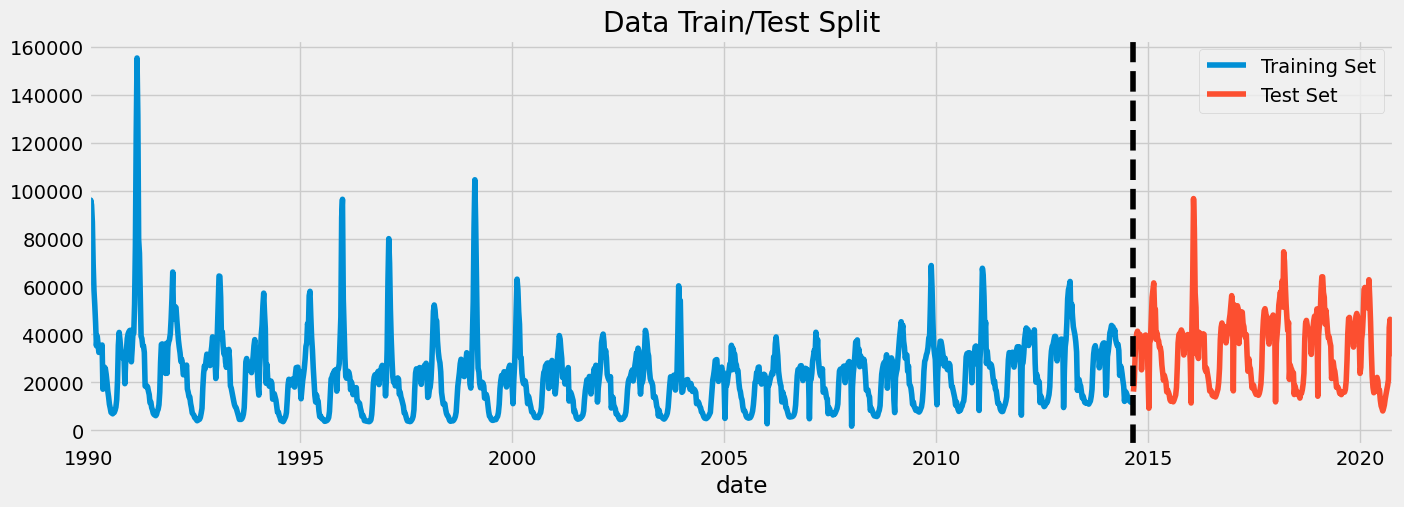

In [117]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('08-31-2014', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

# Create some other features

In [125]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    return df

infections_clear_fetured = create_features(infections_cleared)

/var/folders/_2/3r2pyzk16rdbwgbf6s6rlngr0000gn/T/ipykernel_1383/2566589114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=infections_clear_fetured, x='month', y='Всего', palette='Blues')


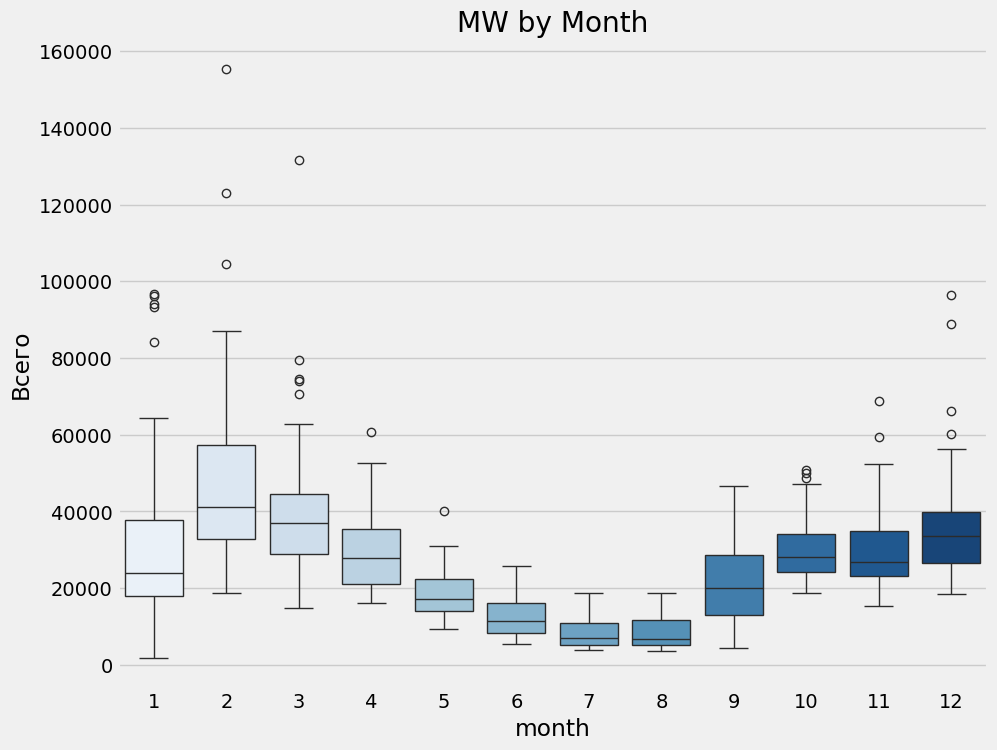

In [126]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=infections_clear_fetured, x='month', y='Всего', palette='Blues')
ax.set_title('MW by Month')
plt.show()

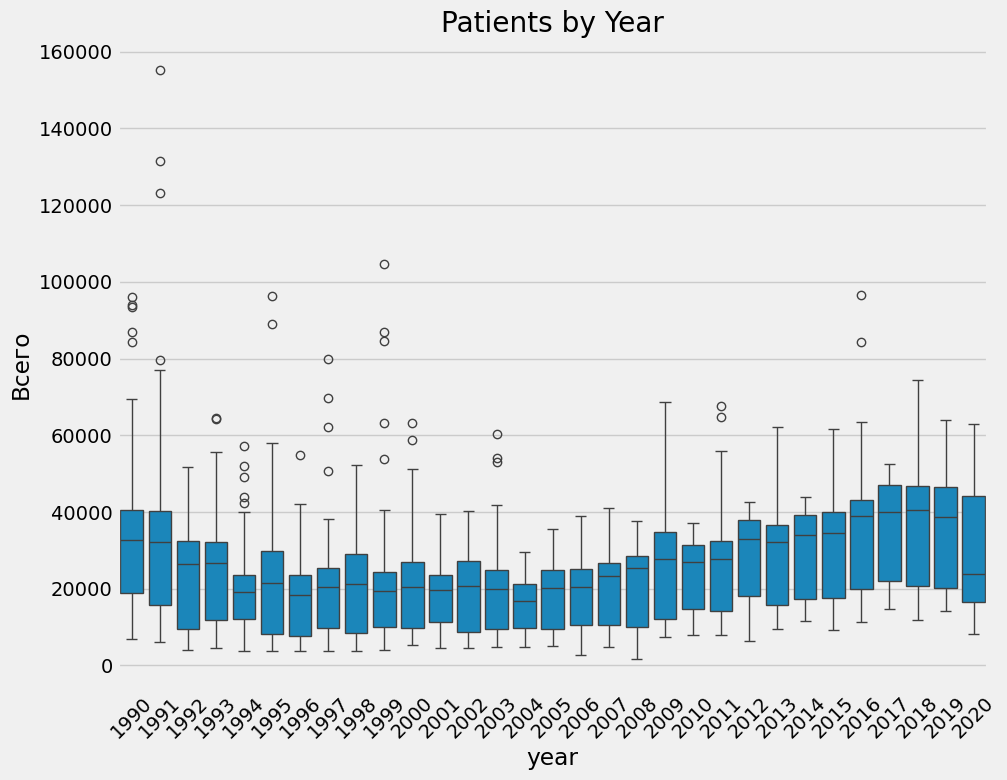

In [128]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=infections_clear_fetured, x='year', y='Всего')
ax.set_title('Patients by Year')
plt.xticks (rotation= 45 )
plt.show()

In [141]:
train.index.month

Index([1, 1, 1, 1, 2, 2, 2, 2, 3, 3,
       ...
       6, 6, 7, 7, 7, 7, 8, 8, 8, 8],
      dtype='int32', name='date', length=1286)

In [153]:
# train_featured = create_features(train)
# tes_featured = create_features(test)
train = infections_clear_fetured[['Всего', 'quarter', 'month', 'year']].loc[infections_clear_fetured.index < '08-31-2014']
test = infections_clear_fetured[['Всего', 'quarter', 'month', 'year']].loc[infections_clear_fetured.index >= '08-31-2014']

In [154]:
FEATURES = ['quarter', 'month', 'year']
TARGET = 'Всего'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [1163]:
from reservoirpy.datasets import henon_map, rossler

henon = henon_map(1000)
rossler_attractor = rossler(1000, x0=[1, 1, 0])

## ARIMA & SARIMA

In [254]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

# import pmd

In [277]:
# Обучение модели ARIMA
model_arima = ARIMA(y_train, order=(1, 0, 0)) # 1,1,2
model_fitted_ARIMA = model_arima.fit()

# Вывод статистики модели
# print(model_fitted_ARIMA.summary())

/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [284]:
y_train.values.reshape(-1, 1)[:5]

array([[84268],
       [93313],
       [96043],
       [94043],
       [86911]])

In [300]:
print('\t ARIMA MODEL : In - Sample Forecasting \n')

history = [x for x in infections_cleared[:y_train.shape[0]]['Всего']]
predictions = []

for t in range(len(y_test)):

    model = ARIMA(history, order=(1,1,2))
    model_fit = model.fit(disp=False)

    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))

    obs = y_test[t]
    history.append(obs)

    # print(f'predicted = {yhat}, expected = {obs}')

	 ARIMA MODEL : In - Sample Forecasting 

predicted = 14110.660978166481, expected = 16139
predicted = 17506.400917379437, expected = 20057
predicted = 21101.775687764268, expected = 30122
predicted = 31750.937018237397, expected = 37589
predicted = 37446.78342110914, expected = 40231
predicted = 38931.73758433583, expected = 41353
predicted = 39825.680869996104, expected = 39253
predicted = 37146.818477972825, expected = 39168
predicted = 37792.678245413226, expected = 40015
predicted = 38598.37770865833, expected = 39174
predicted = 37405.99352205993, expected = 25234
predicted = 21587.037898295333, expected = 34973
predicted = 37211.889648301774, expected = 37211
predicted = 35516.874955476844, expected = 38823
predicted = 37850.8540917294, expected = 39514
predicted = 38014.683453274236, expected = 39760
predicted = 38245.24707936383, expected = 38302
predicted = 36509.379437066615, expected = 34492
predicted = 32585.719376136854, expected = 23520
predicted = 20972.292002941394, ex

In [ ]:
predictions = pd.DataFrame(predictions, index=X_test.index)

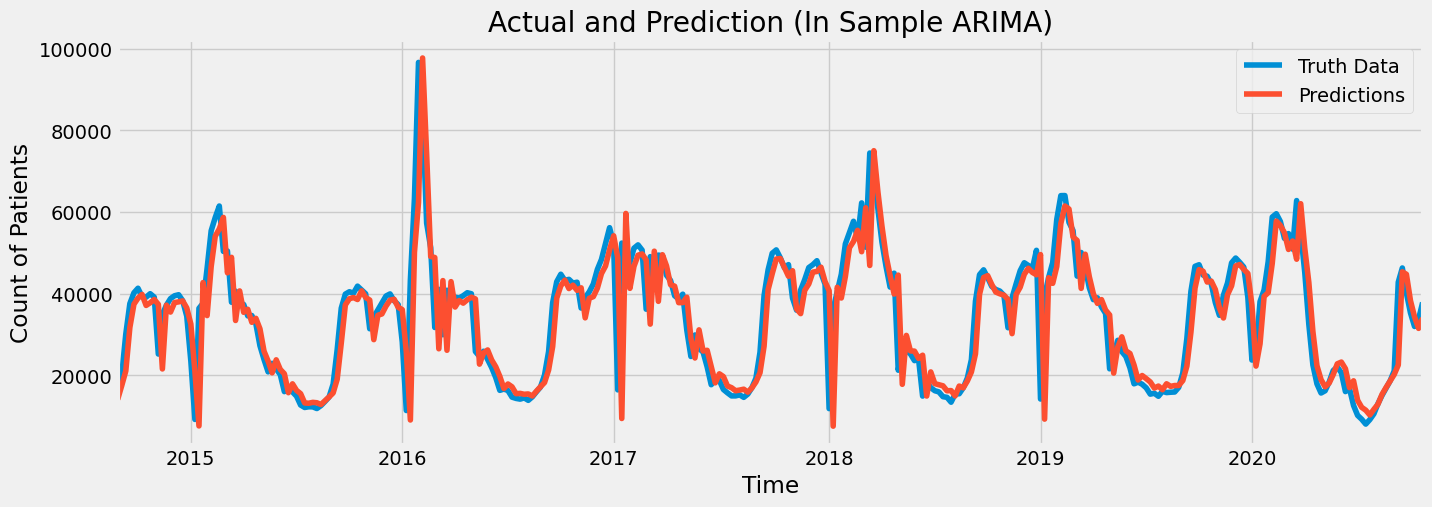

In [560]:
# Прогноз на основе обученной модели
ax = test[['Всего']].plot(figsize=(15, 5))
predictions.plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Actual and Prediction (In Sample ARIMA)')
plt.ylabel('Count of Patients')
plt.xlabel('Time')
plt.show()

In [310]:
r2_score(y_test, predictions)

0.7213562780856227

## henon * rossler arima

In [1327]:
print('\t ARIMA MODEL : In - Sample Forecasting \n')

history = henon[:int(len(henon)*0.8), 1].reshape(-1,1).tolist()
predictions_henon_arima = []

for t in range(len(henon) - int(len(henon)*0.8)):

    model = ARIMA(history, order=(1,1,2))
    model_fit = model.fit()

    output = model_fit.forecast()
    yhat = output[0]
    predictions_henon_arima.append(float(yhat))

    history.append(henon[t+int(len(henon)*0.8)])

	 ARIMA MODEL : In - Sample Forecasting 



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (801,) + inhomogeneous part.

In [1326]:
henon[:int(len(henon)*0.8), 0].reshape(-1,1)[:5].tolist()

AttributeError: 'list' object has no attribute 'flatten'

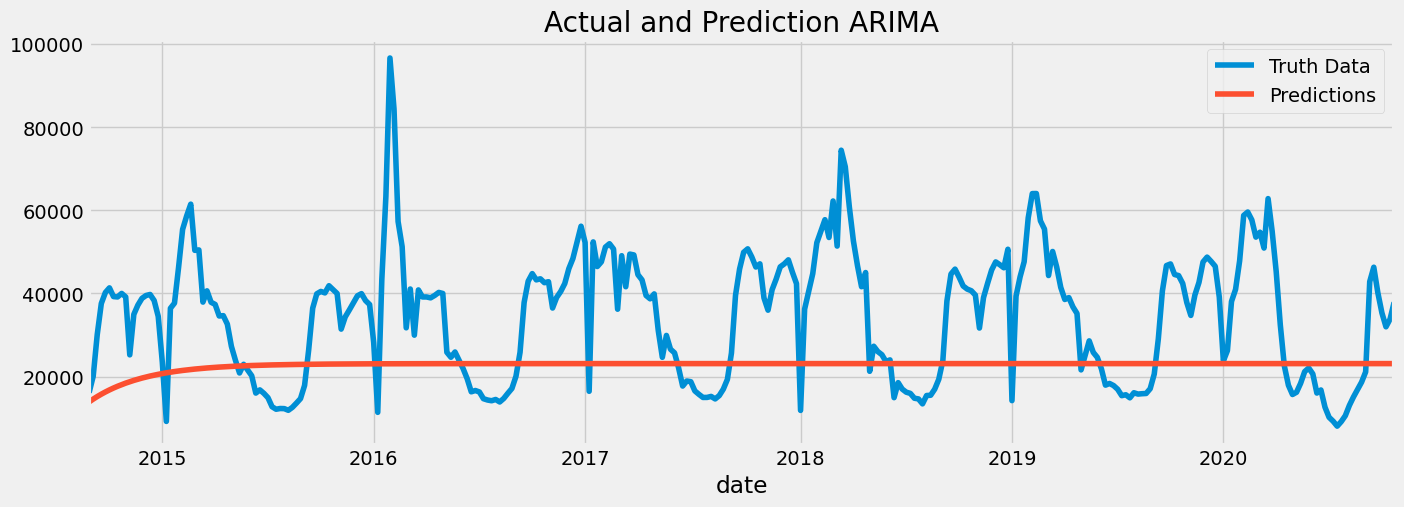

In [319]:
# Прогноз на основе обученной модели
forecast_arima = model_fitted_ARIMA.forecast(steps=y_test.shape[0])

ax = test[['Всего']].plot(figsize=(15, 5))
forecast_arima.plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Actual and Prediction ARIMA')
plt.show()

In [247]:
# Обучение модели SARIMA
model_sarima = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
model_fitted_sarima = model_sarima.fit()

# Вывод статистики модели
print(model_fitted_sarima.summary())

/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02055D+01    |proj g|=  6.06690D-02

At iterate    5    f=  1.01692D+01    |proj g|=  1.11819D-02

At iterate   10    f=  1.01676D+01    |proj g|=  4.86359D-04

At iterate   15    f=  1.01676D+01    |proj g|=  1.43917D-04

At iterate   20    f=  1.01675D+01    |proj g|=  4.89898D-03

At iterate   25    f=  1.01032D+01    |proj g|=  8.84268D-02

At iterate   30    f=  1.00916D+01    |proj g|=  9.18696D-03

At iterate   35    f=  1.00854D+01    |proj g|=  6.70235D-03

At iterate   40    f=  1.00851D+01    |proj g|=  8.13324D-03

At iterate   45    f=  1.00827D+01    |proj g|=  2.38357D-02

At iterate   50    f=  1.00639D+01    |proj g|=  3.96558D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [248]:
# Прогноз на основе обученной модели
forecast_sarima = model_fitted_sarima.forecast(steps=y_test.shape[0])

In [250]:
forecast_sarima.head()

2014-08-31    13365.990873
2014-09-07    12987.139173
2014-09-14    13185.894214
2014-09-21    13148.895503
2014-09-28    13021.465995
Freq: W-SUN, Name: predicted_mean, dtype: float64

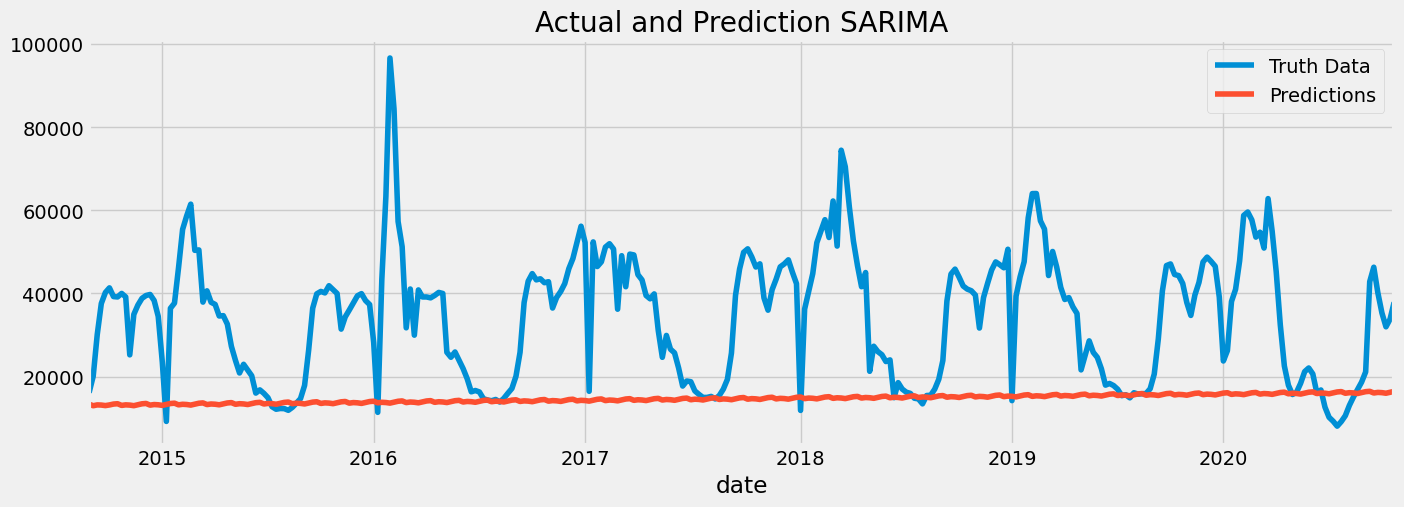

In [306]:
ax = test[['Всего']].plot(figsize=(15, 5))
forecast_sarima.plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Actual and Prediction SARIMA')
plt.show()

In [314]:
print('\t SARIMAX MODEL : In - Sample Forecasting \n')

history = [x for x in infections_cleared[:y_train.shape[0]]['Всего']]
predictions_sarima = []

for t in range(len(y_test)):

    model_sarima = SARIMAX(history, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7), enforce_stationarity=False)
    model_fitted_sarima = model_sarima.fit(disp=False)

    output = model_fitted_sarima.forecast()
    yhat = output[0]
    predictions_sarima.append(float(yhat))

    history.append(y_test[t])

	 SARIMAX MODEL : In - Sample Forecasting 



/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/roman14/.

In [315]:
predictions_sarima = pd.DataFrame(predictions_sarima, index=X_test.index)

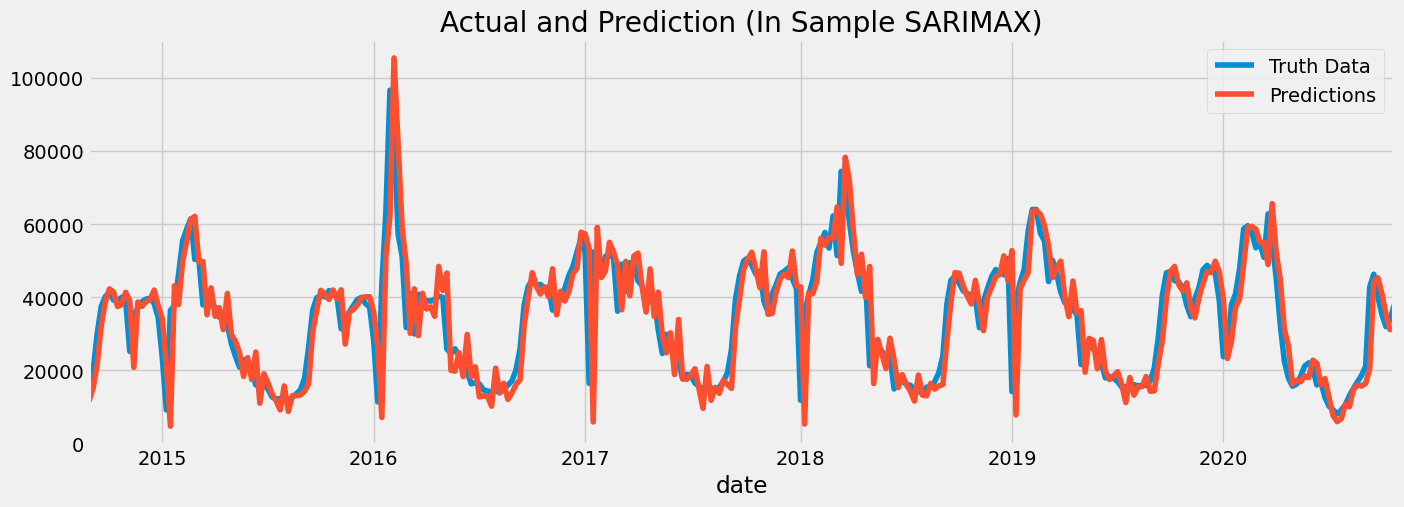

In [942]:
# Прогноз на основе обученной модели
ax = test[['Всего']].plot(figsize=(15, 5))
predictions_sarima.plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Actual and Prediction (In Sample SARIMAX)')
plt.show()

In [317]:
r2_score(y_test, predictions_sarima)

0.6606567157398331

#### Henon * Rossler ARIMA/SARIMA

## Prophet

In [216]:
from prophet import Prophet

In [ ]:
scaler = MinMaxScaler()

In [1330]:
prophet_model = Prophet(interval_width=0.95)
prophet_model_henon = Prophet(interval_width=0.95)
prophet_model_rossler = Prophet(interval_width=0.95)

In [696]:
y_train_prop = y_train.copy()
y_train_prop = y_train_prop.reset_index()
y_train_prop.rename(columns = {'Всего':'y', 'date':'ds'}, inplace = True)
# y_train_prop['y'] = scaler.fit_transform(y_train_prop['y'].to_numpy().reshape(-1, 1))

In [1328]:
df_henon = pd.DataFrame({'ds': pd.date_range(start='1/1/2018', periods=henon.shape[0]), 'y': henon[:, 1]})

df_rossler = pd.DataFrame({'ds': pd.date_range(start='1/1/2018', periods=rossler_attractor.shape[0]), 'y': rossler_attractor[:, 1]})

In [1329]:
henon_train = int(df_henon.shape[0]*0.8)
rossler_train = int(df_rossler.shape[0]*0.8)

In [1232]:
df_rossler.head()

ds         y
0 2018-01-01  1.000000
1 2018-01-02  0.893161
2 2018-01-03  0.773889
3 2018-01-04  0.643667
4 2018-01-05  0.503932

In [219]:
y_train_prop.head()

ds      y
0 1990-01-07  84268
1 1990-01-14  93313
2 1990-01-21  96043
3 1990-01-28  94043
4 1990-02-04  86911

In [220]:
y_train_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1286 non-null   datetime64[ns]
 1   y       1286 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.2 KB


In [1331]:
prophet_model.fit(y_train_prop)
prophet_model_henon.fit(df_henon[:henon_train])
prophet_model_rossler.fit(df_rossler[:rossler_train])

15:09:50 - cmdstanpy - INFO - Chain [1] start processing
15:09:51 - cmdstanpy - INFO - Chain [1] done processing
15:09:51 - cmdstanpy - INFO - Chain [1] start processing
15:09:51 - cmdstanpy - INFO - Chain [1] done processing
15:09:51 - cmdstanpy - INFO - Chain [1] start processing
15:09:51 - cmdstanpy - INFO - Chain [1] done processing


In [1332]:
future_dates = prophet_model.make_future_dataframe(periods=y_test.shape[0], freq='W')
future_henon = prophet_model_henon.make_future_dataframe(periods=df_henon.shape[0] - henon_train, freq='D')
future_rossler = prophet_model_rossler.make_future_dataframe(periods=df_rossler.shape[0] - rossler_train, freq='D')
future_dates.tail()

ds
1603 2020-09-27
1604 2020-10-04
1605 2020-10-11
1606 2020-10-18
1607 2020-10-25

In [1333]:
forecast = prophet_model.predict(future_dates)
forecast_henon = prophet_model.predict(future_henon)
forecast_rossler = prophet_model.predict(future_rossler)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1603 2020-09-27  40896.123704  22901.988956  58119.760542
1604 2020-10-04  42030.451245  23565.468105  60585.449154
1605 2020-10-11  42181.174822  23991.309470  61171.930957
1606 2020-10-18  42334.736582  22580.164987  60414.215261
1607 2020-10-25  42386.457550  24513.752122  60707.617565

In [1238]:
df_henon.head()

ds         y
0 2018-01-01  0.000000
1 2018-01-02  1.000000
2 2018-01-03 -0.400000
3 2018-01-04  1.076000
4 2018-01-05 -0.740886

In [1334]:
forecast_rossler[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds          yhat    yhat_lower    yhat_upper
0 2018-01-01  37358.651543  20285.706296  55686.321741
1 2018-01-02  36831.828081  19389.228424  54013.080890
2 2018-01-03  36349.920628  18717.387405  55781.073527
3 2018-01-04  35919.882647  18410.933456  54203.821232
4 2018-01-05  35548.211606  17401.904898  52023.759977

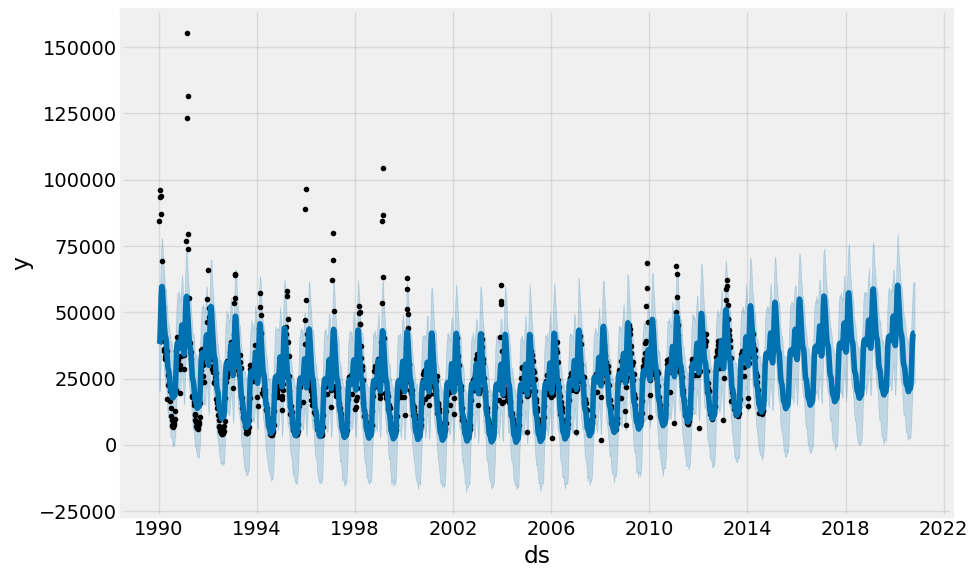

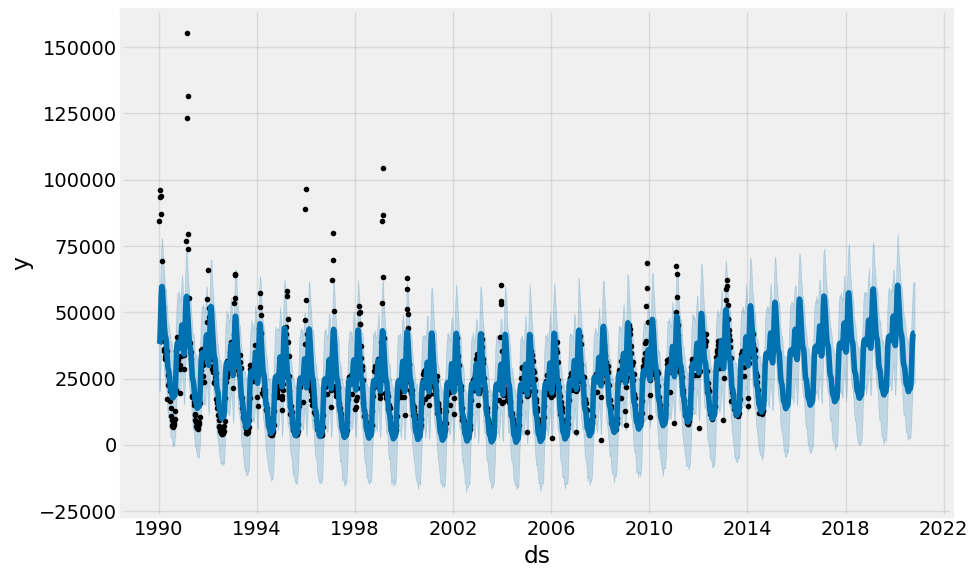

In [700]:
prophet_model.plot(forecast, uncertainty=True)

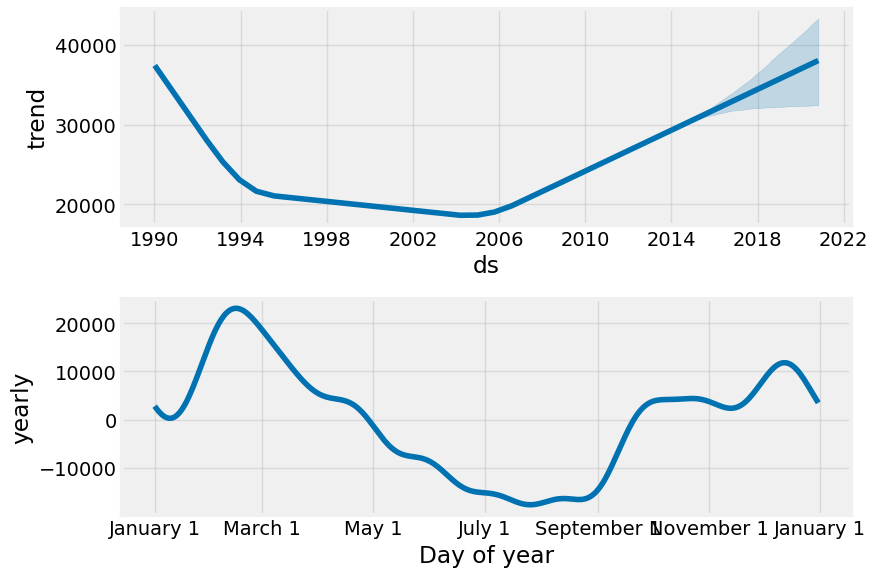

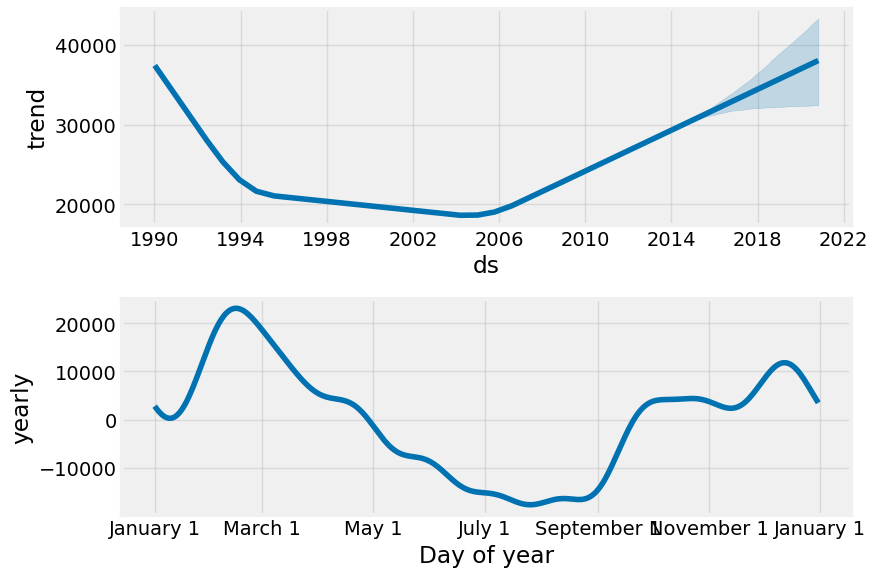

In [236]:
prophet_model.plot_components(forecast)

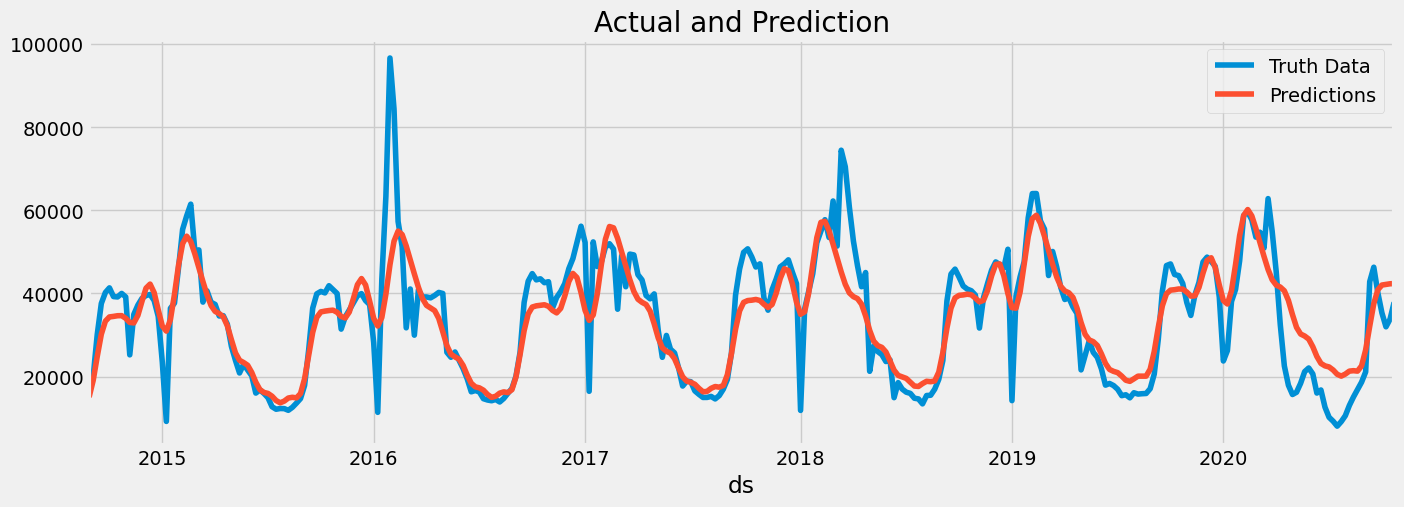

In [1335]:
ax = test[['Всего']].plot(figsize=(15, 5))
# ax = pd.DataFrame(scaler.transform(y_test.to_numpy().reshape(-1, 1)), index=y_test.index).plot(figsize=(15, 5))
forecast.set_index('ds')[y_train.shape[0]:]['yhat'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Actual and Prediction')
plt.show()

In [1336]:
r2_score(y_test, forecast[y_train.shape[0]:]['yhat'])
# r2_score(scaler.transform(y_test.to_numpy().reshape(-1, 1)), forecast[y_train.shape[0]:]['yhat'].to_numpy().reshape(-1,1))

0.7400153418762705

In [1244]:
df_henon.describe()

ds            y
count                 1000  1000.000000
mean   2019-05-15 12:00:00     0.253974
min    2018-01-01 00:00:00    -1.283272
25%    2018-09-07 18:00:00    -0.336799
50%    2019-05-15 12:00:00     0.406171
75%    2020-01-20 06:00:00     0.856926
max    2020-09-26 00:00:00     1.271689
std                    NaN     0.723162

In [1337]:
from sklearn.preprocessing import minmax_scale

Text(0.5, 1.0, 'Henon Map Predictions')

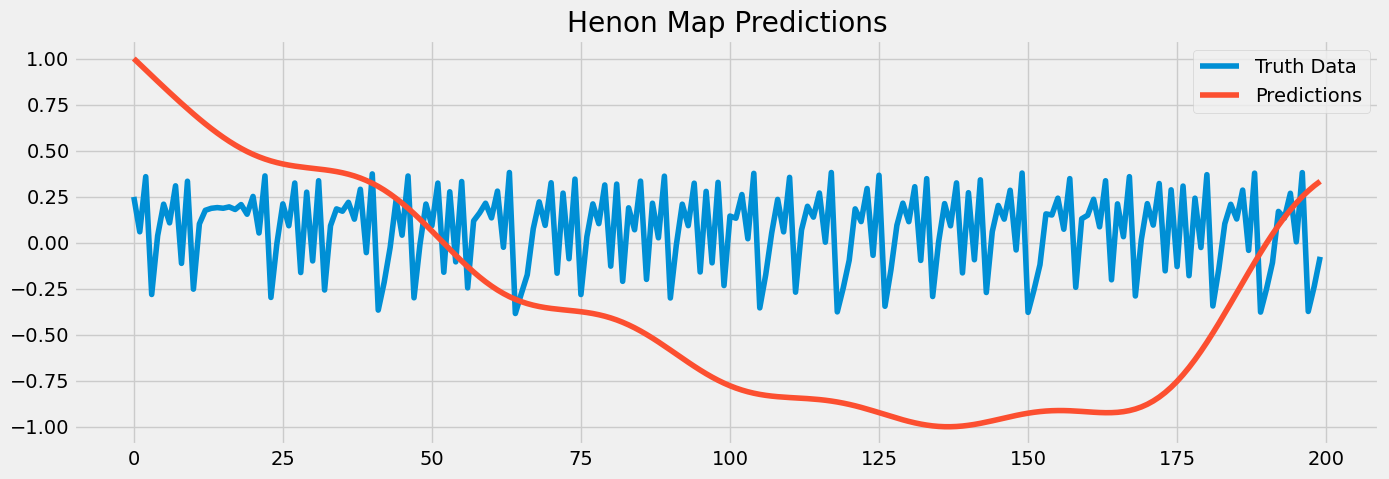

In [1338]:
plt.figure(figsize=(15,5))
plt.plot(df_henon[henon_train:]['y'].to_numpy())
plt.plot(minmax_scale(forecast_henon[henon_train:]['yhat'].to_numpy().reshape(-1,1), feature_range=(-1, 1)))
plt.legend(['Truth Data', 'Predictions'])
plt.title('Henon Map Predictions')

Text(0.5, 1.0, 'Rossler Attractor Predictions')

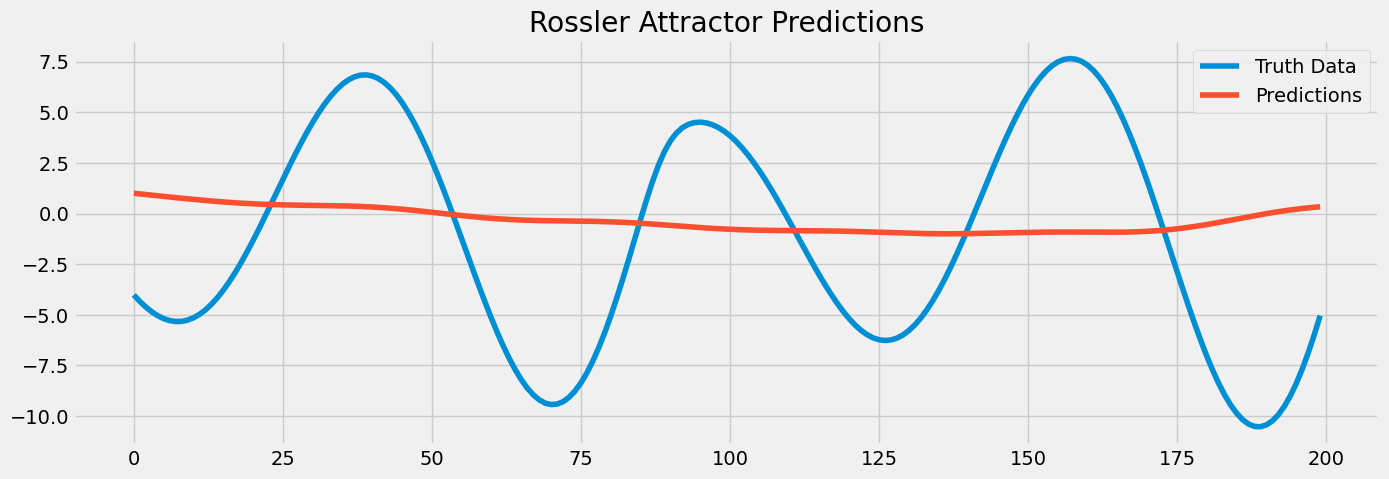

In [1339]:
plt.figure(figsize=(15,5))
plt.plot(df_rossler[rossler_train:]['y'].to_numpy())
plt.plot(minmax_scale(forecast_rossler[rossler_train:]['yhat'].to_numpy().reshape(-1,1), feature_range=(-1, 1)))
plt.legend(['Truth Data', 'Predictions'])
plt.title('Rossler Attractor Predictions')

## Ensemble method

In [158]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [161]:
estimators = [('xgb', xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)),
              ('rf', RandomForestRegressor(n_estimators=10, max_depth=None,
                                           min_samples_split=2, random_state=23))]

final_estimator = GradientBoostingRegressor(n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,
    random_state=23)

stack = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)

In [162]:
stack.fit(X_train, MinMaxScaler.fit_transform(y_train))

/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [01:45:44] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_b6b50u1t0e/croot/xgboost-split_1713972723244/work/cpp_src/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [01:45:45] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_b6b50u1t0e/croot/xgboost-split_1713972723244/work/cpp_src/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [01:45:46] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_b6b50u1t0e/croot/xgboost-split_1713972723244/work/cpp_src/src/objective/regression_obj.cu:209: reg:linear is 

StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1000, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='reg:linear', ...)),
                              ('rf',
                               RandomForestRegressor(n_estimators=10,
                                                     random_state=23))],
                  final_estimator=GradientBoostingRegressor(max_features=1,
                                                            min_samples_leaf=25,
                                                            n_estimators=25,
                                                            random_state=23,
                                                            subsample=0.5))

In [185]:
stack_pred = pd.DataFrame(stack.predict(X_test), index=X_test.index)

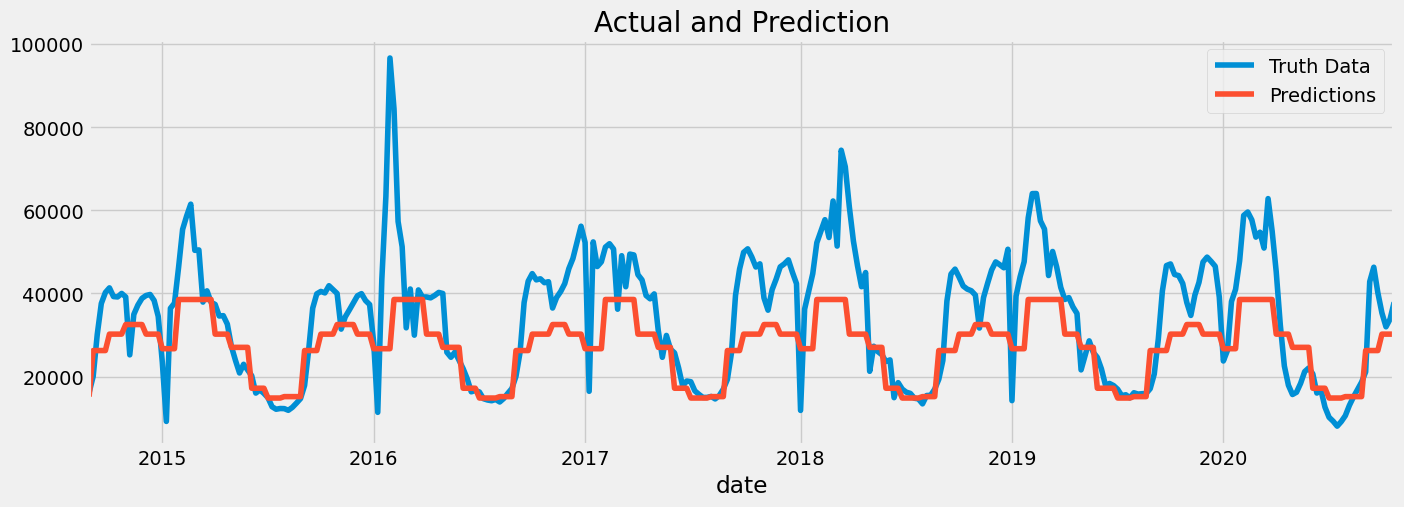

In [192]:
ax = test[['Всего']].plot(figsize=(15, 5))
stack_pred.plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Actual and Prediction')
plt.show()

In [193]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [1269]:
r2_score(y_test, stack_pred)

0.340093094319182

In [1298]:
# stack.fit(df_henon.reset_index()[:henon_train]['index'].to_numpy().reshape(-1,1),df_henon[:henon_train]['y'].to_numpy().reshape(-1,1))
stack.fit(henon[:henon_train, 1].reshape(-1,1),df_henon[:henon_train]['y'].to_numpy().reshape(-1,1))

/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/sklearn/ensemble/_stacking.py:955: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:38:41] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_b6b50u1t0e/croot/xgboost-split_1713972723244/work/cpp_src/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:38:43] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_b6b50u1t0e/croot/xgboost-split_1713972723244/work/cpp_src/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserW

StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1000, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='reg:linear', ...)),
                              ('rf',
                               RandomForestRegressor(n_estimators=10,
                                                     random_state=23))],
                  final_estimator=GradientBoostingRegressor(max_features=1,
                                                            min_samples_leaf=25,
                                                            n_estimators=25,
                                                            random_state=23,
                                                            subsample=0.5))

In [1299]:
# stack_pred_henon = stack.predict(df_henon.reset_index()[henon_train:]['index'].to_numpy().reshape(-1,1))
stack_pred_henon = stack.predict(henon[henon_train:, 1].reshape(-1,1))

Text(0.5, 1.0, 'Henon Map Stacking Predictions')

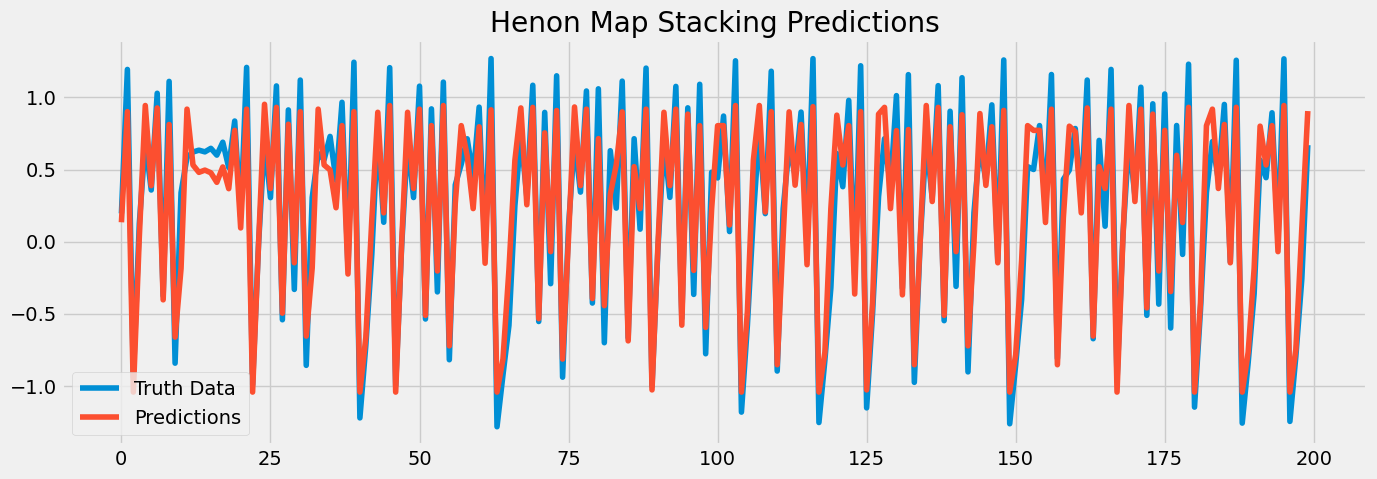

In [1306]:
plt.figure(figsize=(15,5))
plt.plot(df_henon[henon_train:]['y'].to_numpy())
plt.plot(stack_pred_henon)
plt.legend(['Truth Data', 'Predictions'])
plt.title('Henon Map Stacking Predictions')

In [1301]:
r2_score(df_henon[henon_train:]['y'], stack_pred_henon)

0.9199262765226819

In [1302]:
# stack.fit(df_rossler.reset_index()[:rossler_train]['index'].to_numpy().reshape(-1,1)
#           ,df_rossler[:rossler_train]['y'].to_numpy().reshape(-1,1))

stack.fit(rossler_attractor[:rossler_train, 1:].reshape(-1,2)
          ,df_rossler[:rossler_train]['y'].to_numpy().reshape(-1,1))

/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/sklearn/ensemble/_stacking.py:955: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:45:16] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_b6b50u1t0e/croot/xgboost-split_1713972723244/work/cpp_src/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:45:18] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_b6b50u1t0e/croot/xgboost-split_1713972723244/work/cpp_src/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserW

StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1000, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='reg:linear', ...)),
                              ('rf',
                               RandomForestRegressor(n_estimators=10,
                                                     random_state=23))],
                  final_estimator=GradientBoostingRegressor(max_features=1,
                                                            min_samples_leaf=25,
                                                            n_estimators=25,
                                                            random_state=23,
                                                            subsample=0.5))

In [1303]:
# stack_pred_rossler = stack.predict(df_rossler.reset_index()[rossler_train:]['index'].to_numpy().reshape(-1,1))
stack_pred_rossler = stack.predict(rossler_attractor[rossler_train:, 1:].reshape(-1,2))

Text(0.5, 1.0, 'Actual and Prediction')

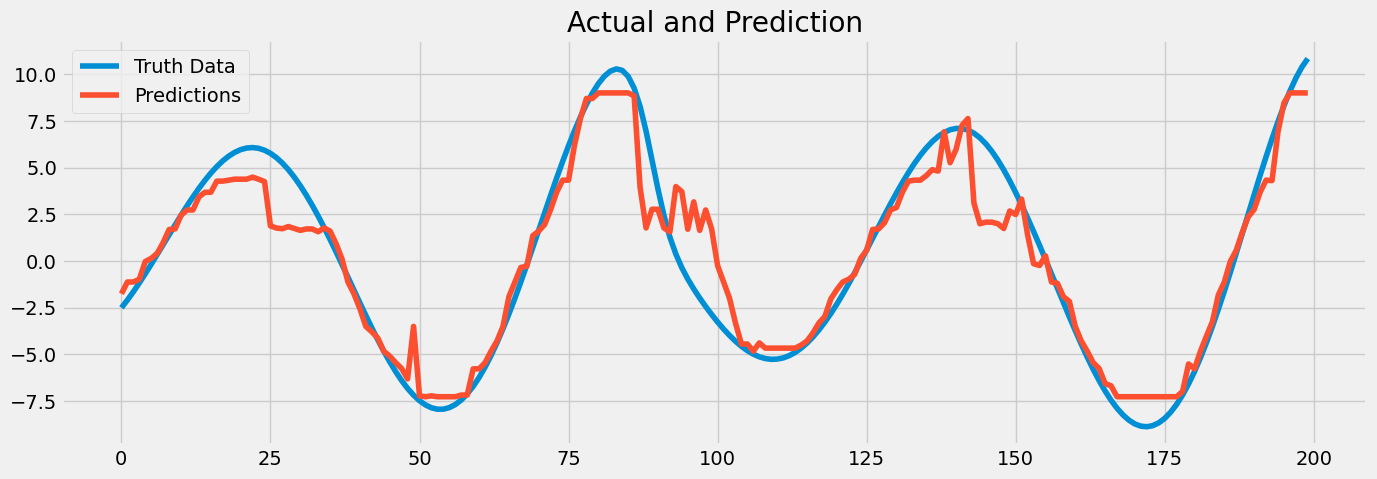

In [1304]:
plt.figure(figsize=(15,5))
plt.plot(df_rossler[rossler_train:]['y'].to_numpy())
plt.plot(stack_pred_rossler)
plt.legend(['Truth Data', 'Predictions'])
plt.title('Actual and Prediction')

In [1305]:
r2_score(rossler_attractor[rossler_train:, 0], stack_pred_rossler)

0.9187457500529401

## LSTM

In [591]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU

AttributeError: module 'tensorflow.compat.v2.__internal__' has no attribute 'register_load_context_function'

In [603]:
sc = MinMaxScaler()

## GRU

quarter  month  year
date                            
1990-01-07        1      1  1990
1990-01-14        1      1  1990
1990-01-21        1      1  1990
1990-01-28        1      1  1990
1990-02-04        1      2  1990

## ESN

In [ ]:
# def scale(array):
#     array_scaled = 2 * (array - array.min()) / (array.max() - array.min()) - 1
#     return array_scaled

In [ ]:
# X_train = y1[:300].reshape(-1, 1)
# Y_train = y1[50:350].reshape(-1, 1)
#
# X_test = y1[300:-50].reshape(-1, 1)
# Y_test = y1[350:].reshape(-1, 1)

In [1097]:
X_train_esn = sc.fit_transform(infections_cleared[:y_train.shape[0]]['Всего'].to_numpy().reshape(-1, 1))
y_train_esn = sc.transform(infections_cleared[1:y_train.shape[0]+1]['Всего'].to_numpy().reshape(-1, 1))

X_test_esn = sc.transform(infections_cleared[y_train.shape[0]:]['Всего'].to_numpy().reshape(-1, 1))
y_test_esn = sc.transform(infections_cleared[y_train.shape[0]:]['Всего'].to_numpy().reshape(-1, 1))

In [1023]:
# infections_cleared[y_train.shape[0]-102:].head()

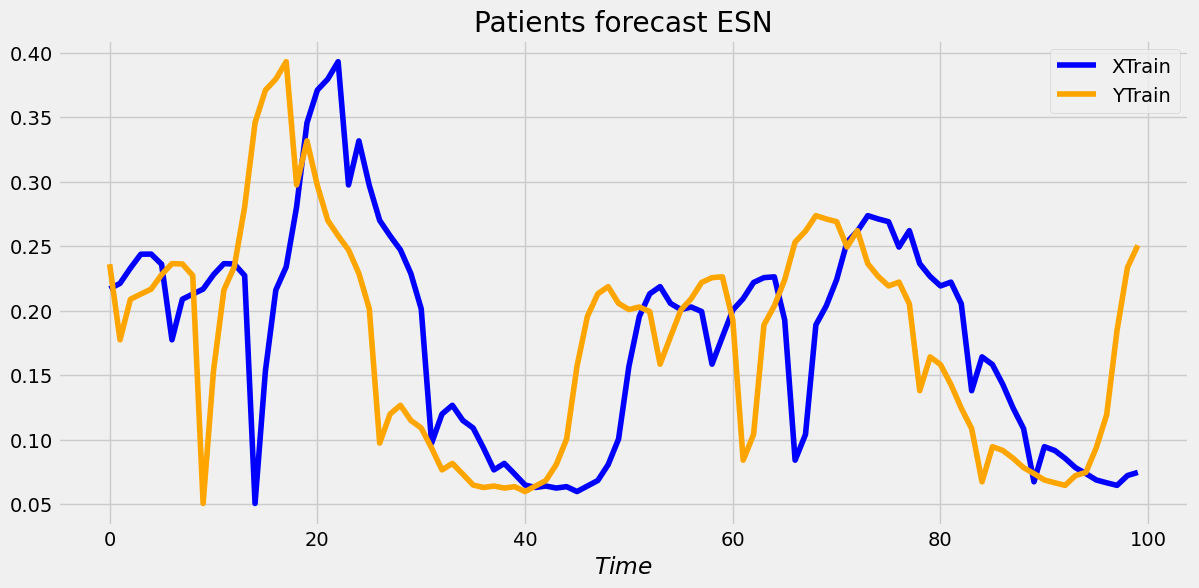

In [1090]:
plt.figure(figsize=(13, 6))
plt.title("Patients forecast ESN")
plt.xlabel("$Time$")
plt.plot(X_train_esn[-100:], label="XTrain", color="blue")
plt.plot(y_train_esn[-100:], label="YTrain", color="orange")
plt.legend()

In [1091]:
# X_train_esn = scale(X_train_esn)
# y_train_esn = scale(y_train_esn)
#
# X_test_esn = scale(X_test_esn)
# y_test_esn = scale(y_test_esn)

In [981]:
X_train_esn.shape

(1236, 1)

In [1098]:
from reservoirpy.nodes import Reservoir, Ridge

reservoir_esn = Reservoir(100, lr=0.5, sr=0.9, regularization = 1e-8)
readout_esn = Ridge(ridge=1e-7)

esn_model = reservoir >> readout

In [1099]:
esn_model = esn_model.fit(X_train_esn, y_train_esn, warmup=100)

Running Model-99:   0%|          | 0/1 [00:00<?, ?it/s]
Running Model-99: 1286it [00:00, 10893.15it/s]         
Running Model-99: 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]


Fitting node Ridge-18...


In [1100]:
esn_preds = esn_model.run(X_test_esn)

Running Model-99: 322it [00:00, 7836.23it/s]           


In [782]:
esn_preds.shape

(322, 1)

In [783]:
y_test_esn.shape

(322, 1)

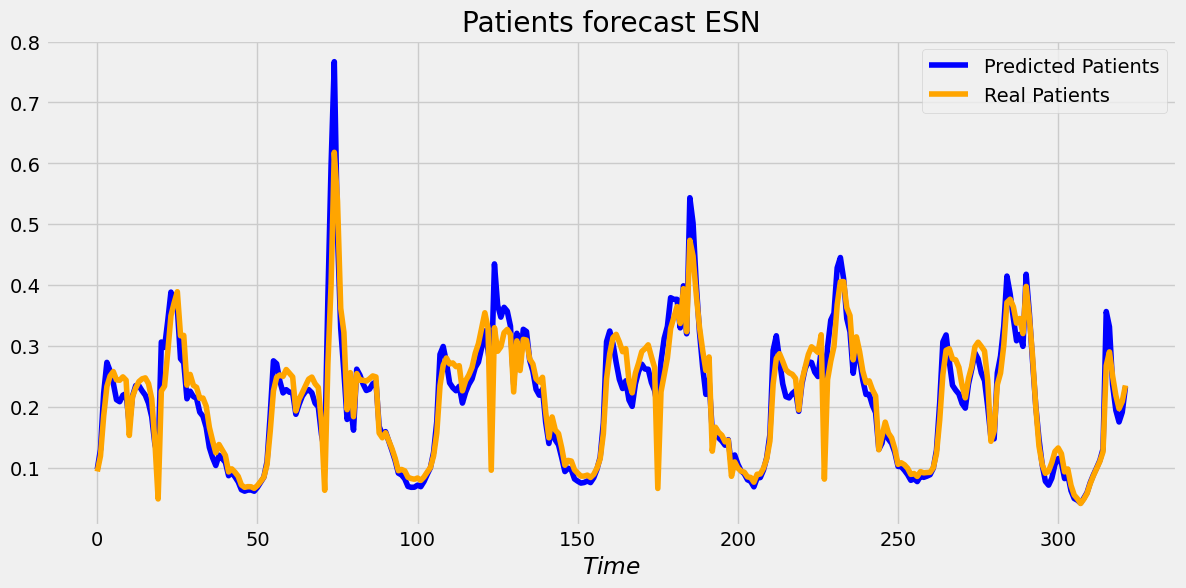

In [1101]:
plt.figure(figsize=(13, 6))
plt.title("Patients forecast ESN")
plt.xlabel("$Time$")
plt.plot(esn_preds, label="Predicted Patients", color="blue")
plt.plot(y_test_esn, label="Real Patients", color="orange")
plt.legend()

In [1102]:
r2_score(y_test_esn, esn_preds)

0.8782583018435725

## Deep ESN

In [1052]:
from reservoirpy.nodes import Reservoir, Ridge, Input

reservoir1_deep = Reservoir(100, name="res1-deep", lr=0.8, sr=0.9, regularization = 1e-8)
reservoir2_deep = Reservoir(100, name="res2-deep", lr=0.5, sr=0.9, regularization = 1e-8)
reservoir3_deep = Reservoir(100, name="res3-deep", lr=0.25, sr=0.9, regularization = 1e-8)

readout_deep = Ridge(name="readout-deep")

model_deep = reservoir1_deep >> reservoir2_deep >> reservoir3_deep & \
        data >> [reservoir1_deep, reservoir2_deep, reservoir3_deep] >> readout_deep

NameError: Name 'res1-deep' is already taken by another node. Node names should be unique.

In [1103]:
model_deep.fit(X_train_esn, y_train_esn, warmup=100)

Running Model-44:   0%|          | 0/1 [00:00<?, ?it/s]
Running Model-44: 428it [00:00, 4273.71it/s]           
Running Model-44: 1286it [00:00, 4336.02it/s][A
Running Model-44: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]
/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/reservoirpy/nodes/readouts/ridge.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=3.21092e-19): result may not be accurate.
  return linalg.solve(XXT + ridge, YXT.T, assume_a="sym")


Fitting node readout-deep...


'Model-44': Model('Input-1', 'res1-deep', 'Concat-7', 'res2-deep', 'Concat-6', 'res3-deep', 'Concat-5', 'readout-deep')

In [1104]:
deep_preds = model_deep.run(X_test_esn)

Running Model-44: 322it [00:00, 4301.36it/s]           


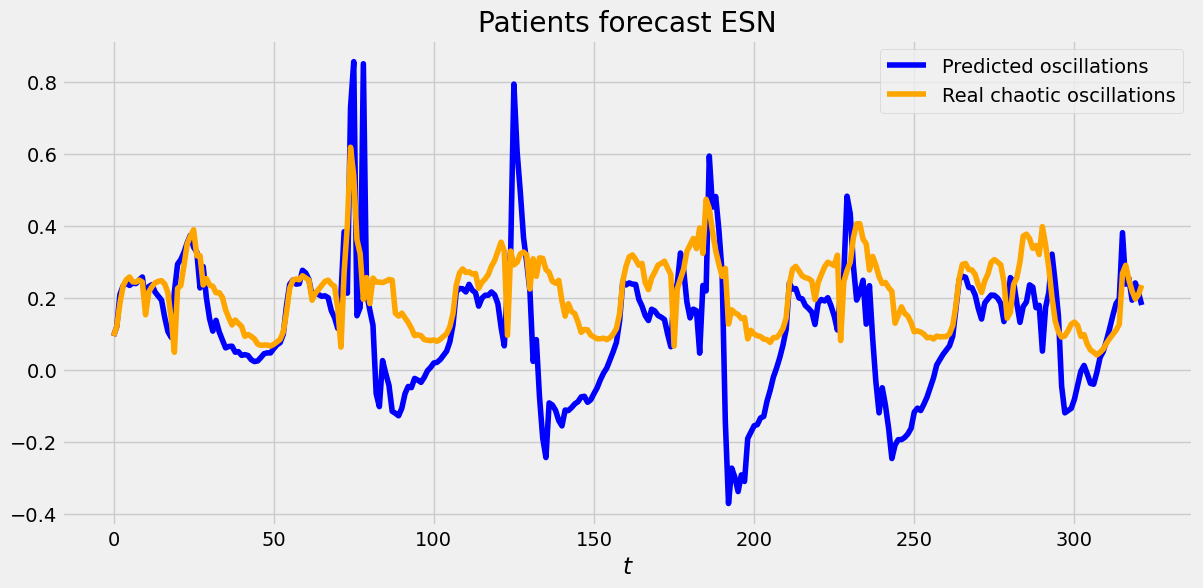

In [1105]:
plt.figure(figsize=(13, 6))
plt.title("Patients forecast ESN")
plt.xlabel("$t$")
plt.plot(deep_preds, label="Predicted oscillations", color="blue")
plt.plot(y_test_esn, label="Real chaotic oscillations", color="orange")
plt.legend()

In [1106]:
r2_score(y_test_esn, deep_preds)

-2.218106435242692

## Hierarchical

In [930]:
from reservoirpy.nodes import Reservoir, Ridge, Input

reservoir1_hier = Reservoir(100, name="res1-hier", lr=0.8, sr=0.9, regularization = 1e-8)
reservoir2_hier = Reservoir(100, name="res2-hier", lr=0.5, sr=0.9, regularization = 1e-8)

readout1_hier = Ridge(ridge=1e-5, name="readout1-hier")
readout2_hier = Ridge(ridge=1e-5, name="readout2-hier")

NameError: Name 'res1-hier' is already taken by another node. Node names should be unique.

In [1107]:
model_hierarchical = reservoir1_hier >> readout1_hier >> reservoir2_hier >> readout2_hier

In [1109]:
model_hierarchical = model_hierarchical.fit(X_train_esn, {"readout1-hier": y_train_esn, "readout2-hier": y_train_esn}, warmup=100)

Running Model-102:   0%|          | 0/1 [00:00<?, ?it/s]
Running Model-102: 1286it [00:00, 9381.92it/s]          
Running Model-102: 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


Fitting node readout1-hier...


Running Model-102:   0%|          | 0/1 [00:00<?, ?it/s]
Running Model-102: 1286it [00:00, 9680.72it/s]          
Running Model-102: 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


Fitting node readout2-hier...


In [1110]:
esn_hier_pred = model_hierarchical.run(X_test_esn)

Running Model-102: 322it [00:00, 8439.51it/s]           


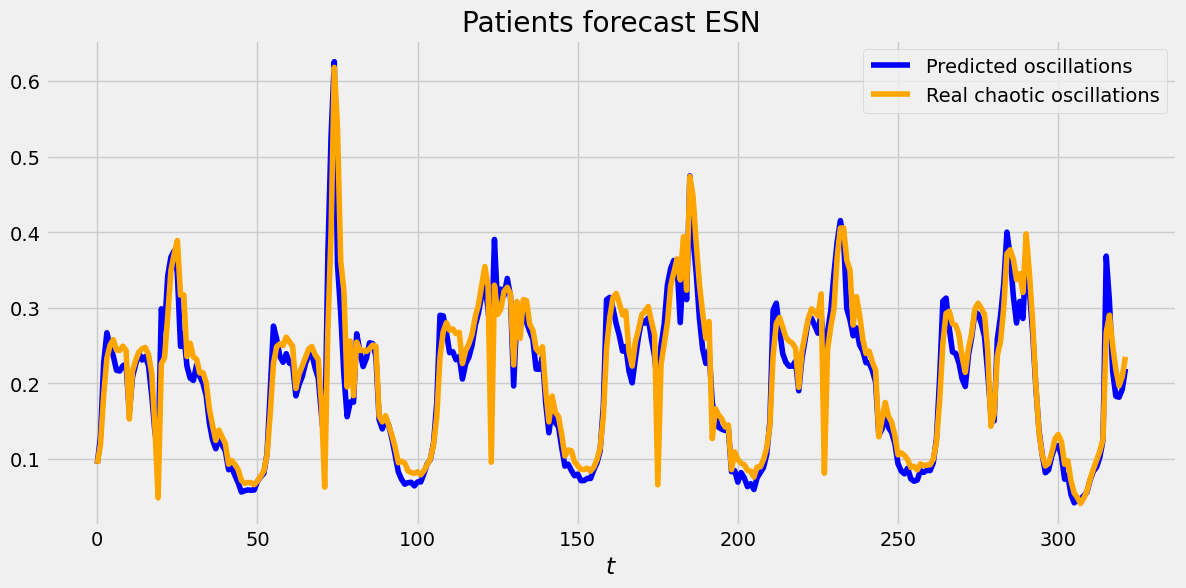

In [1111]:
plt.figure(figsize=(13, 6))
plt.title("Patients forecast ESN")
plt.xlabel("$t$")
plt.plot(esn_hier_pred, label="Predicted oscillations", color="blue")
plt.plot(y_test_esn, label="Real chaotic oscillations", color="orange")
plt.legend()

In [1112]:
r2_score(y_test_esn, esn_hier_pred)

0.891812071294247

## FORCE

In [526]:
units = 100
leak_rate = 0.3
spectral_radius = 1.25
input_scaling = 1.0
connectivity = 0.1
input_connectivity = 0.2
seed = 23

In [527]:
from reservoirpy.nodes import FORCE

reservoir_force = Reservoir(units, input_scaling=input_scaling, sr=spectral_radius,
                      lr=leak_rate, rc_connectivity=connectivity,
                      input_connectivity=input_connectivity, seed=seed)

readout_force = FORCE(1)

In [1113]:
esn_online = reservoir_force >> readout_force
outputs_pre = np.zeros(X_train_esn.shape)
for t, (x, y) in enumerate(zip(X_train_esn, y_train_esn)):  # for each timestep of training data:
    outputs_pre[t, :] = esn_online.train(x, y)

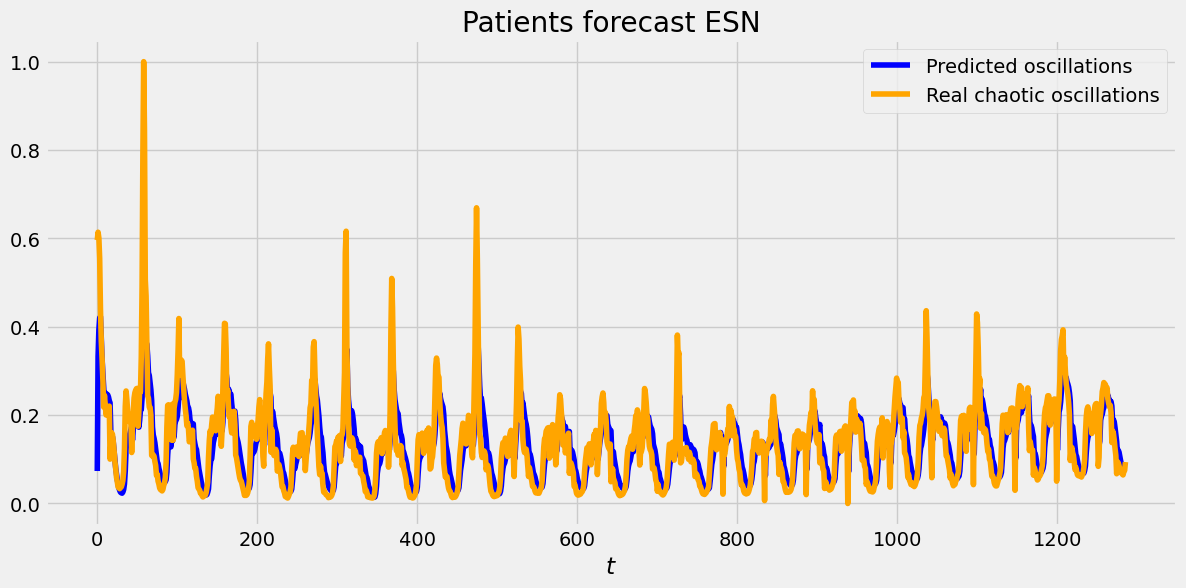

In [1114]:
plt.figure(figsize=(13, 6))
plt.title("Patients forecast ESN")
plt.xlabel("$t$")
plt.plot(outputs_pre, label="Predicted oscillations", color="blue")
plt.plot(y_train_esn, label="Real chaotic oscillations", color="orange")
plt.legend()

In [1115]:
esn_online.train(X_train_esn, y_train_esn)
pred_online = esn_online.run(X_test_esn)

Running Model-103: 322it [00:00, 8172.17it/s]           


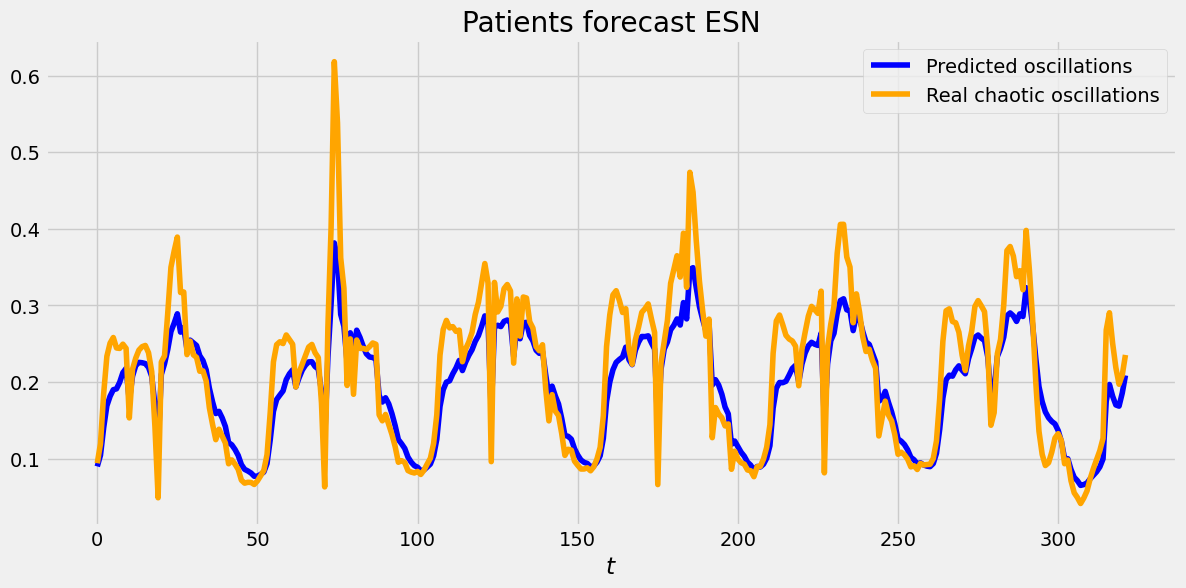

In [1116]:
plt.figure(figsize=(13, 6))
plt.title("Patients forecast ESN")
plt.xlabel("$t$")
plt.plot(pred_online, label="Predicted oscillations", color="blue") #scaler.inverse_transform(pred_online)
plt.plot(y_test_esn, label="Real chaotic oscillations", color="orange")
plt.legend()

In [1117]:
r2_score(y_test_esn, pred_online)

0.7923824527428451

## Van der Pol

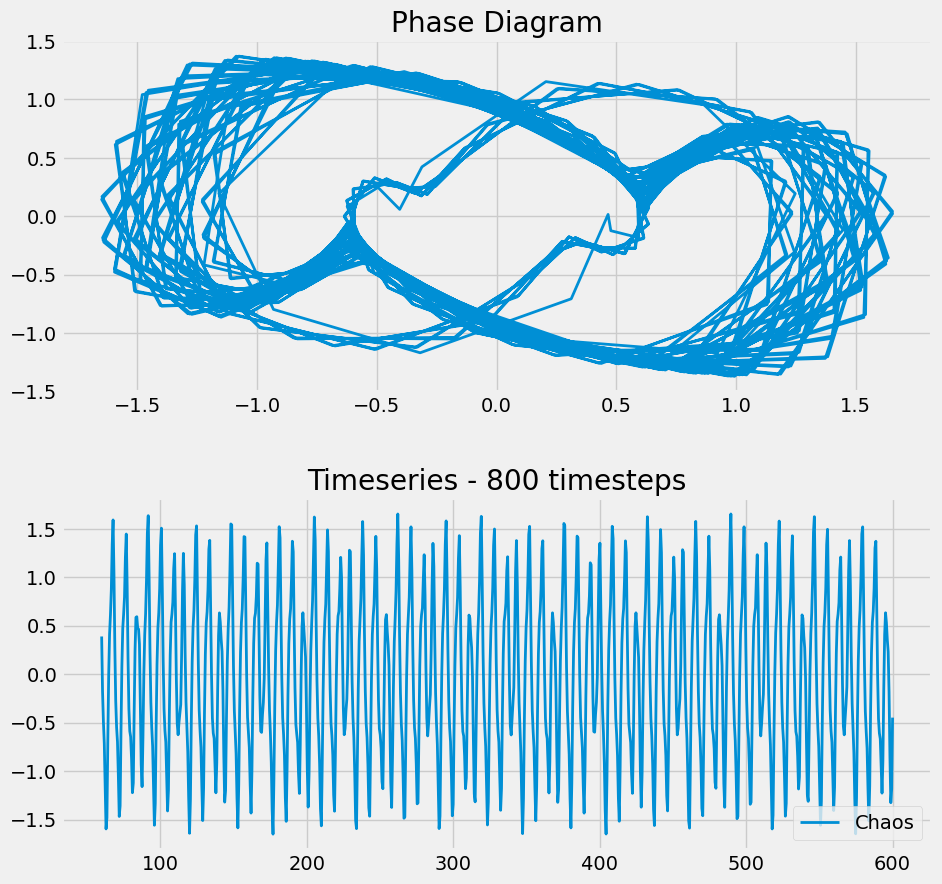

In [1121]:
mu=1.53 #8.53
A=1.1
omega = 2.10
def f_1(y, x):
    y1, y2 = y
    #return [y2, mu*(1-y2**2)*y2-y1]
    return [y2, A*np.sin(omega*x)+mu*(1-y2**2)*y2-y1]
x = np.linspace(0,600,1001)
y0 = [0.0001,0.0001]
[y1,y2]=odeint(f_1, y0, x).T
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.subplot(211)
plt.plot(y1[100:],y2[100:],linewidth=2)
plt.title('Phase Diagram')
plt.grid(True)
plt.subplot(212)
plt.plot(x[100:],y1[100:],linewidth=2, label='Chaos')
plt.title('Timeseries - 800 timesteps')
plt.legend(loc='best')
plt.grid(True)
plt.show()

(1001,)

## Henon Map

Text(0.5, 1.0, 'Hénon Map')

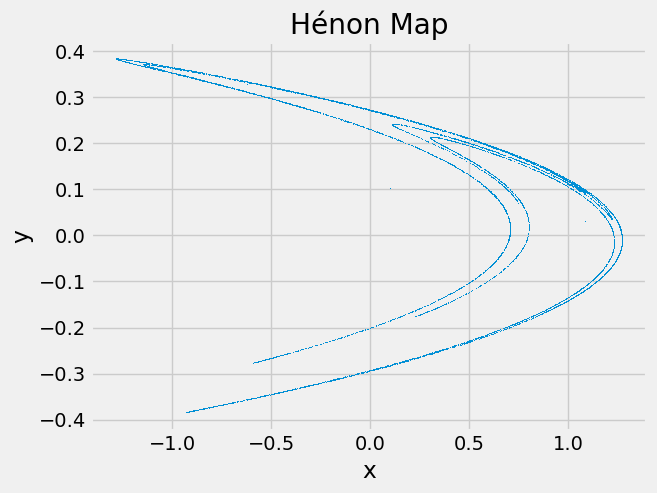

In [1120]:
import numpy as np
import matplotlib.pyplot as plt

# Hénon Map parameters
a = 1.4
b = 0.3

# Initial condition
x0, y0 = 0.1, 0.1
length = 10000

# Generate Hénon map
x, y = [x0], [y0]
for _ in range(length-1):
    x_next = 1 - a * x[-1]**2 + y[-1]
    y_next = b * x[-1]
    x.append(x_next)
    y.append(y_next)

# Plot the Hénon map
plt.plot(x, y, ',')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hénon Map')

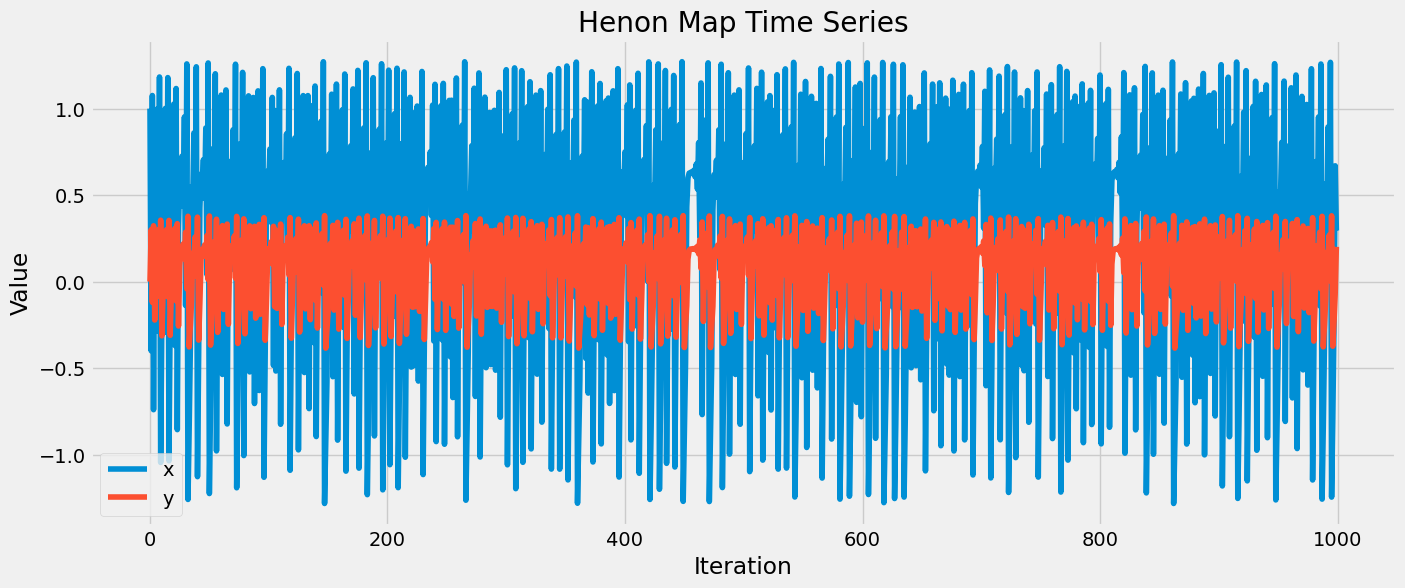

In [1119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Henon map parameters
a_henon = 1.4
b_henon = 0.3

# Initial conditions for Henon map
x_henon = 0
y_henon = 0

# Number of iterations for Henon map
n_iterations = 1000

# Arrays to store the Henon map time series
x_series_henon = np.zeros(n_iterations)
y_series_henon = np.zeros(n_iterations)

# Generate Henon map time series
for i in range(n_iterations):
    x_new = 1 - a_henon * x_henon ** 2 + y_henon
    y_new = b_henon * x_henon
    x_henon, y_henon = x_new, y_new
    x_series_henon[i] = x_henon
    y_series_henon[i] = y_henon

# Plot Henon map time series
plt.figure(figsize=(15, 6))
plt.plot(x_series_henon, label='x')
plt.plot(y_series_henon, label='y')
plt.title('Henon Map Time Series')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()

In [1123]:
from reservoirpy.datasets import henon_map
henon = henon_map(1250)

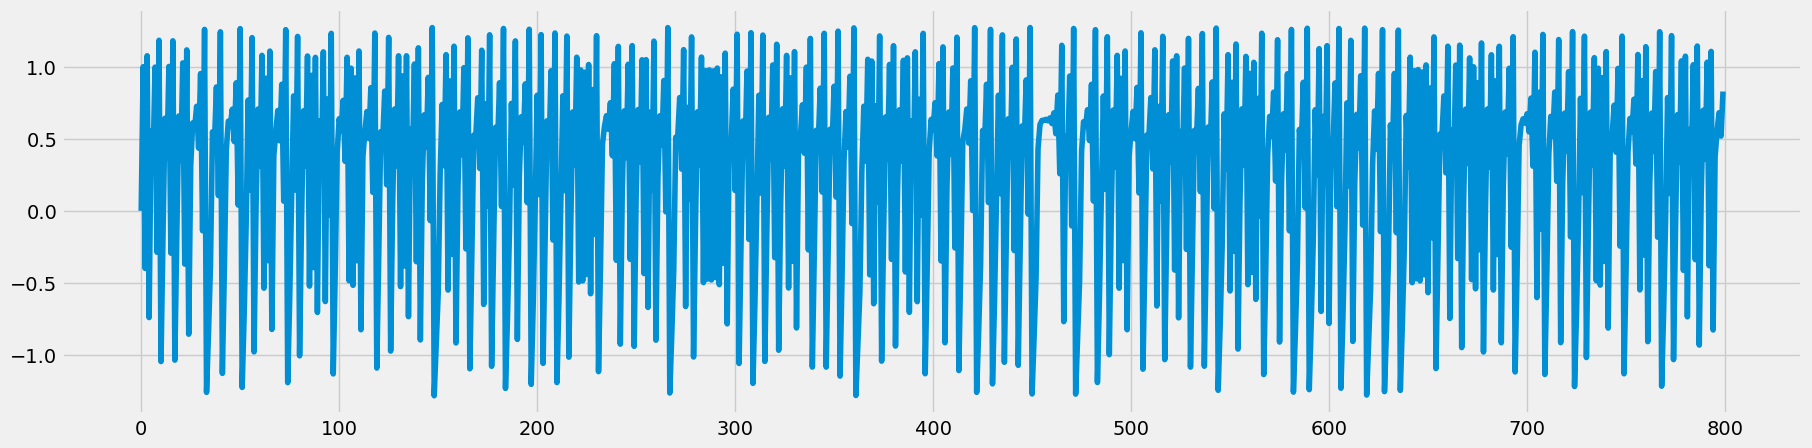

In [1155]:
plt.figure(figsize = (20,5))
plt.plot(x_series_henon[:800])

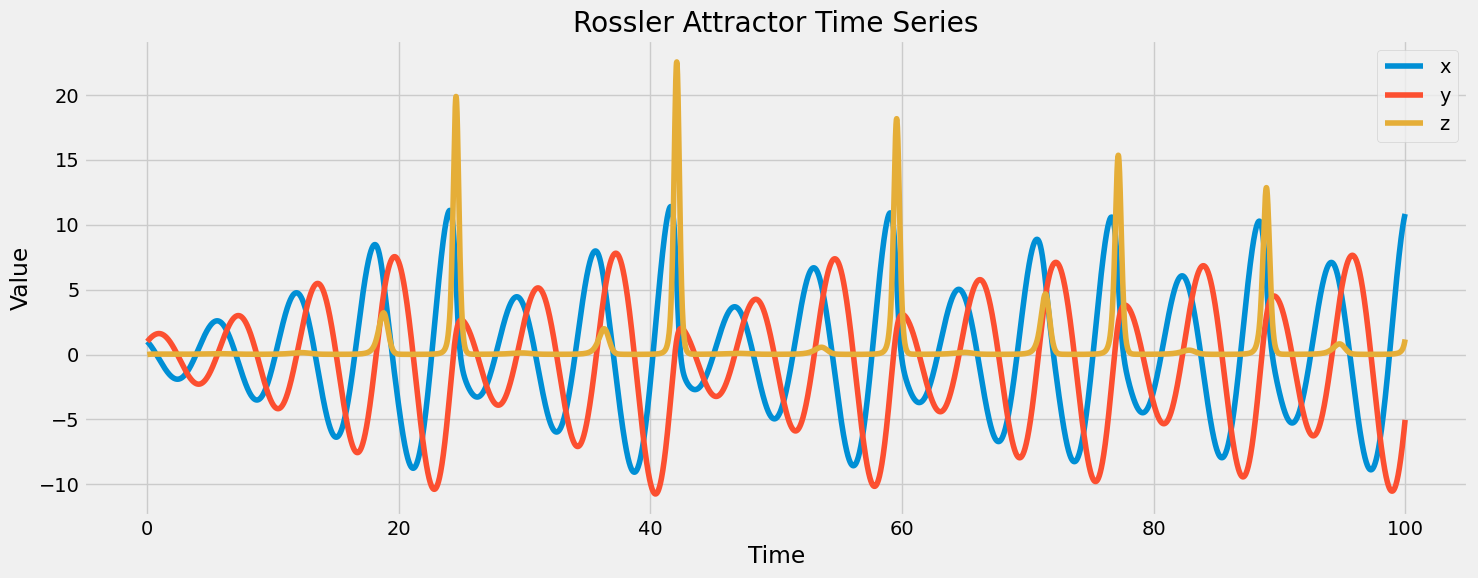

In [1141]:
# Rossler Attractor parameters
a_rossler = 0.2
b_rossler = 0.2
c_rossler = 5.7

# Time points for Rossler Attractor
t_start = 0
t_end = 100
t_points = np.linspace(t_start, t_end, 10000)

# Rossler Attractor equations
def rossler(t, state):
    x, y, z = state
    dxdt = -y - z
    dydt = x + a_rossler * y
    dzdt = b_rossler + z * (x - c_rossler)
    return [dxdt, dydt, dzdt]

# Initial conditions for Rossler Attractor
initial_state_rossler = [1, 1, 0]

# Solve the Rossler system
solution_rossler = solve_ivp(rossler, [t_start, t_end], initial_state_rossler, t_eval=t_points)

# Plot Rossler Attractor time series
plt.figure(figsize=(15, 6))
plt.plot(solution_rossler.t, solution_rossler.y[0], label='x')
plt.plot(solution_rossler.t, solution_rossler.y[1], label='y')
plt.plot(solution_rossler.t, solution_rossler.y[2], label='z')
plt.title('Rossler Attractor Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()

In [1156]:
from reservoirpy.datasets import rossler

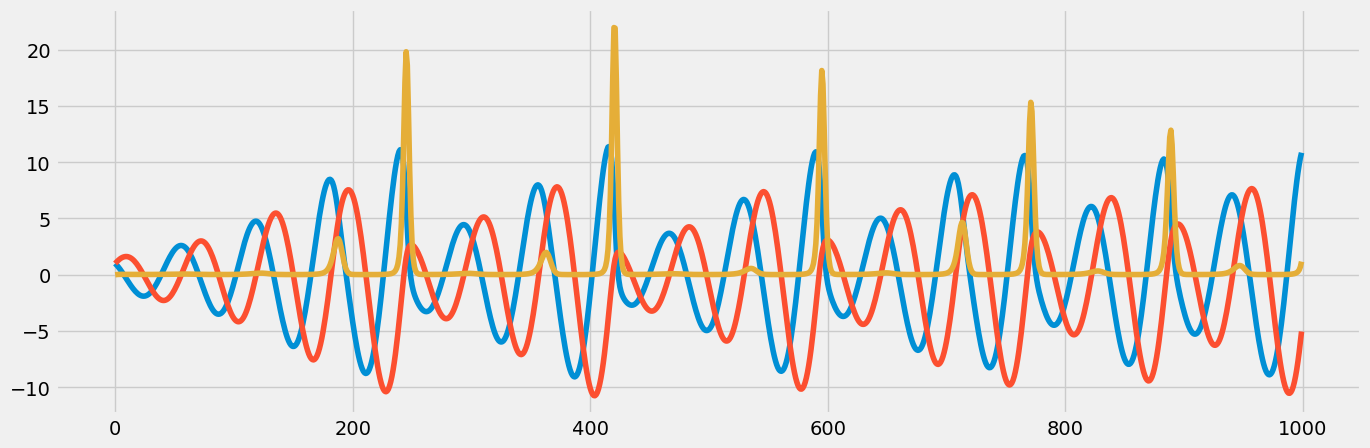

In [1162]:
plt.figure(figsize=(15,5))
plt.plot(rossler(1000, x0=[1, 1, 0]))